<a href="https://colab.research.google.com/github/nakatoconstance/nakatoconstance/blob/main/Yet_another_copy_of_Neural_Network_Models_October_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch

# Set random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)


In [2]:
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.metrics import mean_squared_error, r2_score# importing package for model evaluation
uploaded=files.upload()#C:\Users\USER\OneDrive\Desktop\nakato research\Objective 1 Content\Dataset building\DATASET FOR MODELING HHV\HHV_DATASET_DRY.csv

Saving HHV_DATASET_DRY_final_2.csv to HHV_DATASET_DRY_final_2.csv


In [4]:
data = pd.read_csv('HHV_DATASET_DRY_final_2.csv', encoding='latin-1') # or 'ISO-8859-1', 'cp1252'
data.head()

,Unnamed: 0,Biomass,ASH,VM,FC,C,H,O,N,S,Cel,Hem,Lig,HHV (MJ/kg),Source
0,1.,Alfalfa Stem,5.27,78.92,15.81,47.17,6.00,38.19,2.68,0.20,NaN,NaN,NaN,18.67,[1]
1,2.,alfalfa (lucern),9.40,73.9,16.7,45.00,6.00,36.90,2.50,2.00,NaN,NaN,NaN,18.60,[2]
2,3.,alfalfa seed straw,7.25,72.6,20.15,46.76,5.40,40.72,1.00,0.02,NaN,NaN,NaN,18.45,[2]
3,4.,cotton gin trash,17.60,67.3,15.1,39.59,5.26,36.38,2.09,NaN,20.0,9.1,17.6,16.42,[2]
4,5.,cotton gin waste,9.36,82.16,8.48,49.03,4.71,35.08,1.45,0.36,77.8,16.0,0,16.27,[2]


In [5]:
#data.head()
#count missing values
data.isnull().sum()
#compute percentage
data.isnull().sum()/len(data)*100
#display recouds with empty source column
#DISPLAY SOURCE WITH nan
#print(data['Source'].isna())

,0
Unnamed: 0,0.749064
Biomass,2.247191
ASH,2.621723
VM,8.614232
FC,8.614232
C,2.996255
H,5.617978
O,5.617978
N,5.992509
S,25.842697


In [6]:
# Assuming 'data' is your DataFrame
cols_to_convert = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

Explanation:

sns.jointplot(): This function creates the joint probability distribution plot.
kind='kde': We use kind='kde' to generate a kernel density estimation plot, which shows the distribution of the data as smooth contours. This is better for visualizing outliers compared to a scatter plot or a hexbin plot.
Outlier Visualization: The isolated contours in the plot will indicate the presence of outliers. These are points that are far away from the main concentration of the data.

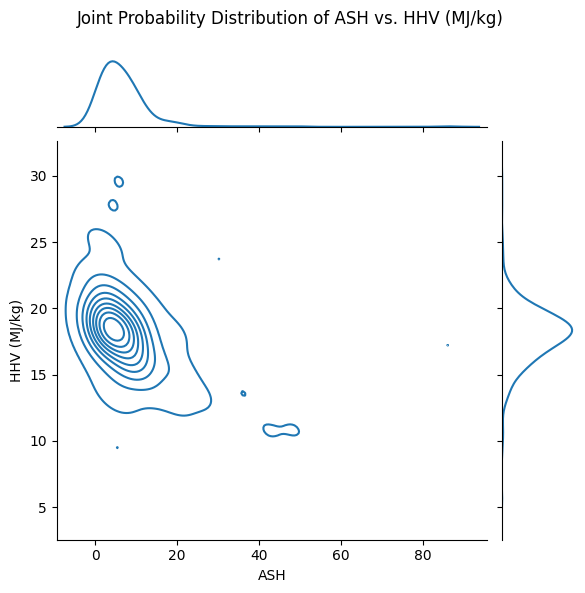

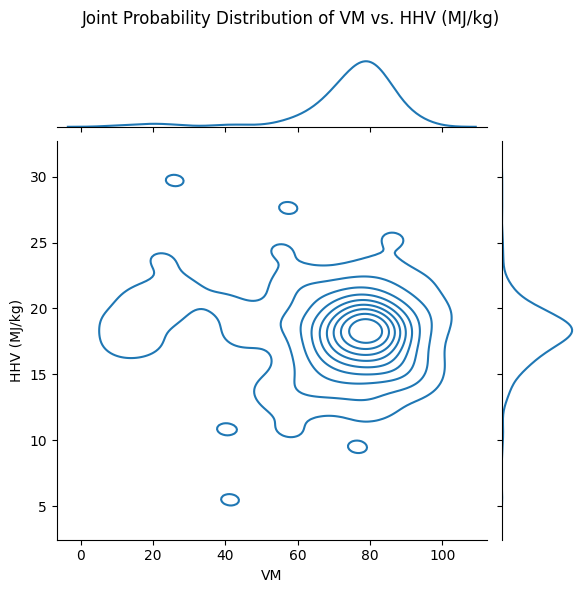

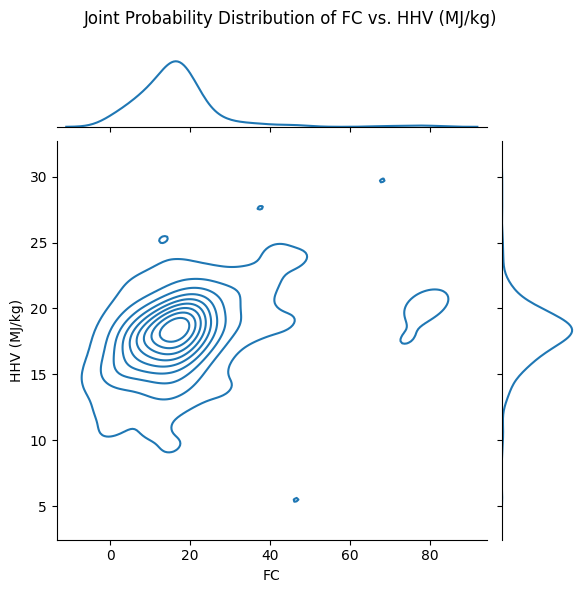

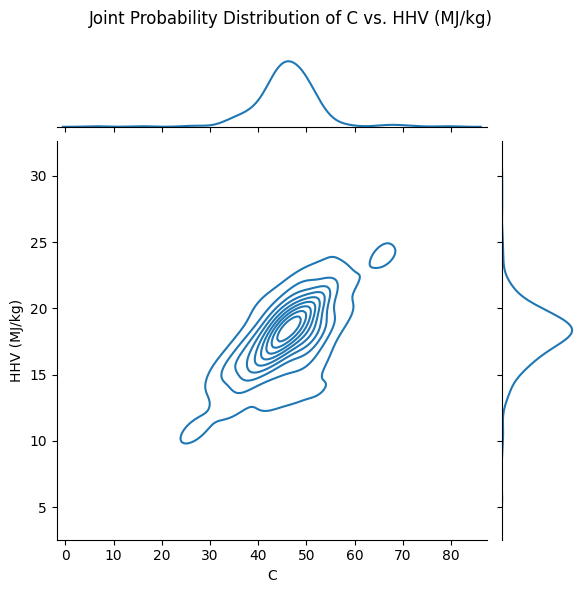

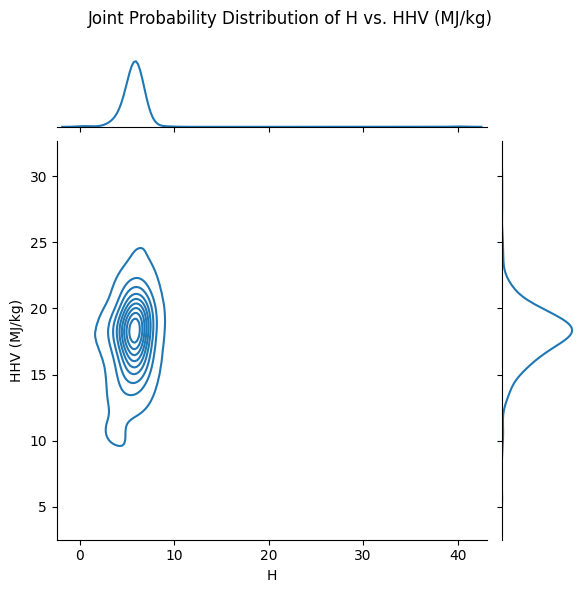

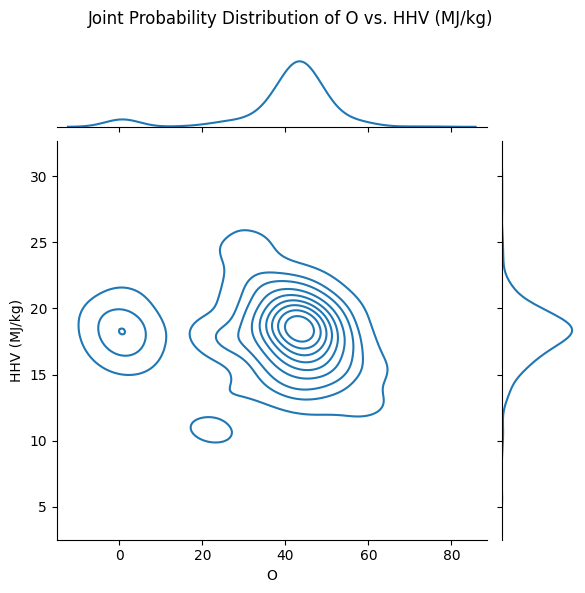

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O']

for column in columns_to_plot:
    g = sns.jointplot(x=column, y='HHV (MJ/kg)', data=data, kind='kde')
    g.fig.suptitle(f'Joint Probability Distribution of {column} vs. HHV (MJ/kg)')
    plt.subplots_adjust(top=0.9)  # Adjust the top margin to prevent title cutoff
    plt.show()

In [8]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

columns_to_impute = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Create KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the data
data_imputed = imputer.fit_transform(data[columns_to_impute])

# Convert the imputed array back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=columns_to_impute, index=data.index)

# Normalize to ensure ASH + VM + FC = 100
data_imputed[['ASH', 'VM', 'FC']] = data_imputed[['ASH', 'VM', 'FC']].div(data_imputed[['ASH', 'VM', 'FC']].sum(axis=1), axis=0) * 100

# Normalize to ensure S + H + C + O + N = 100
data_imputed[['S', 'H', 'C', 'O', 'N']] = data_imputed[['S', 'H', 'C', 'O', 'N']].div(data_imputed[['S', 'H', 'C', 'O', 'N']].sum(axis=1), axis=0) * 100

# Replace original columns with imputed and adjusted values
data[columns_to_impute] = data_imputed[columns_to_impute]

# Now 'data' has missing values filled using KNN imputation and sums adjusted to 100


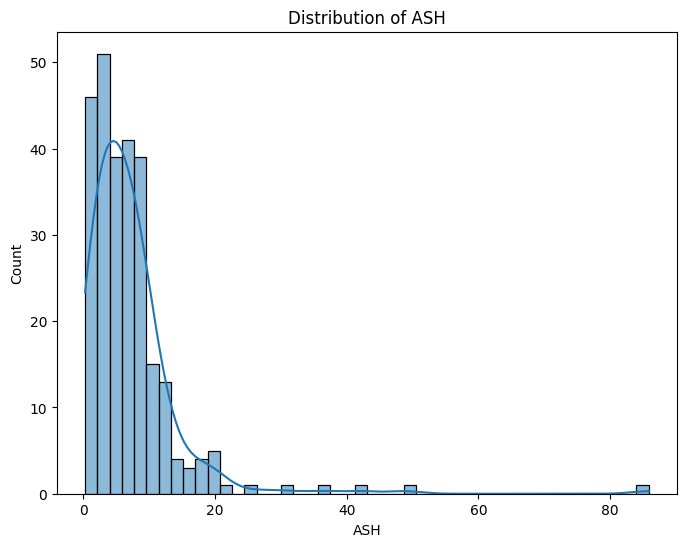

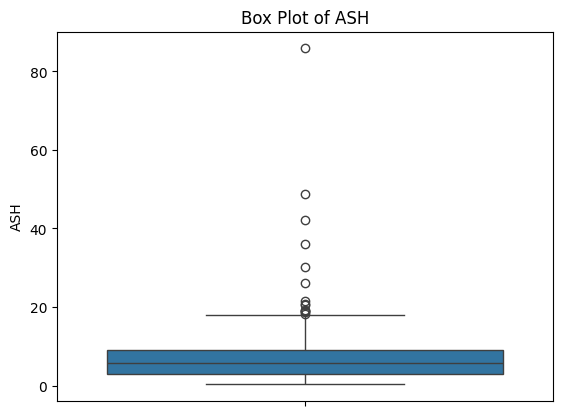

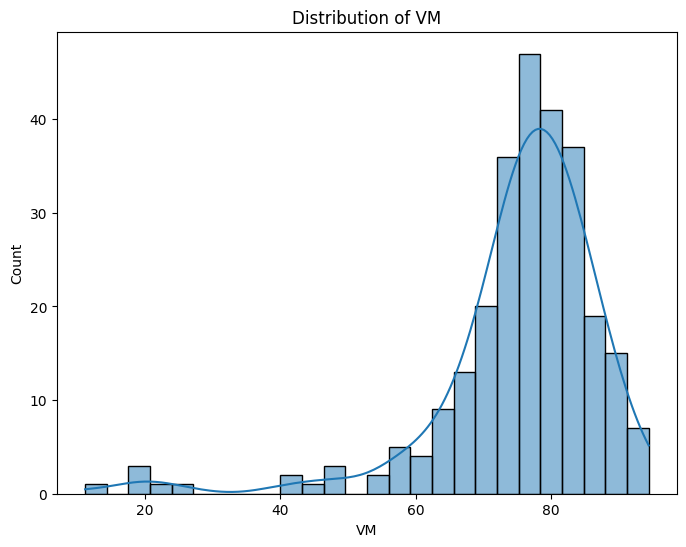

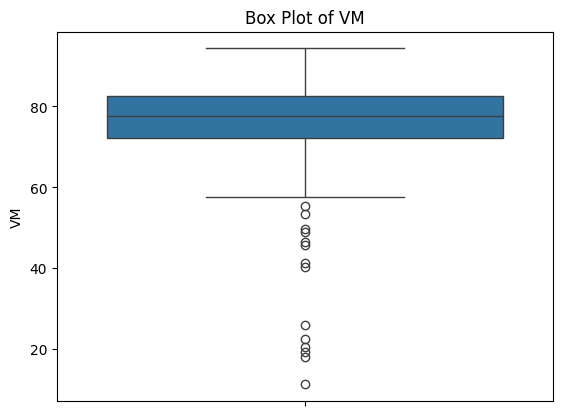

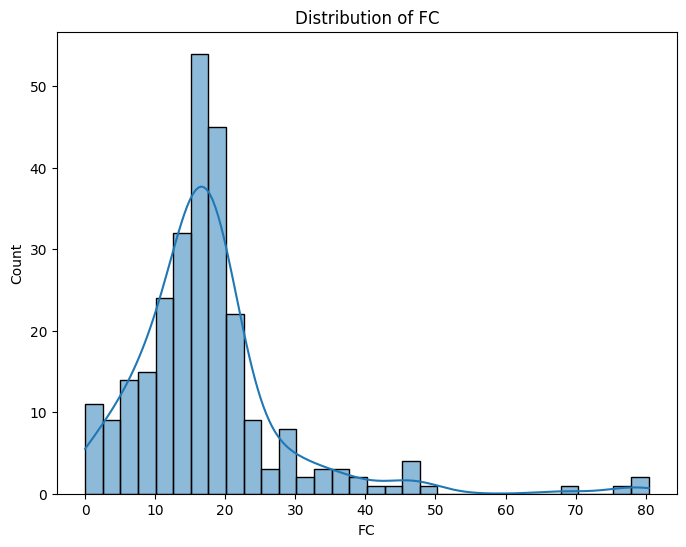

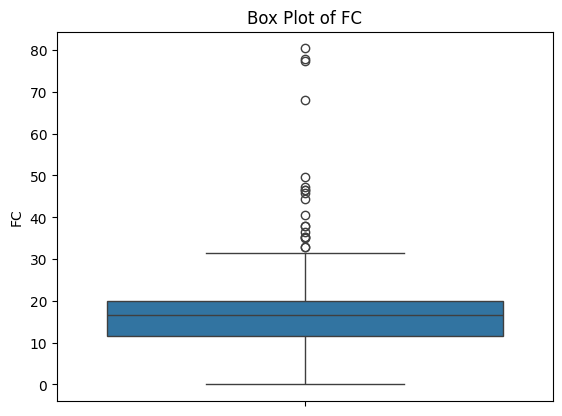

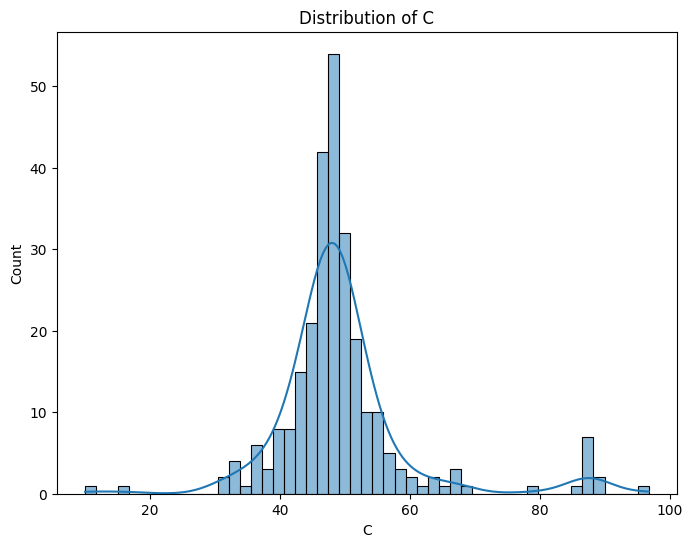

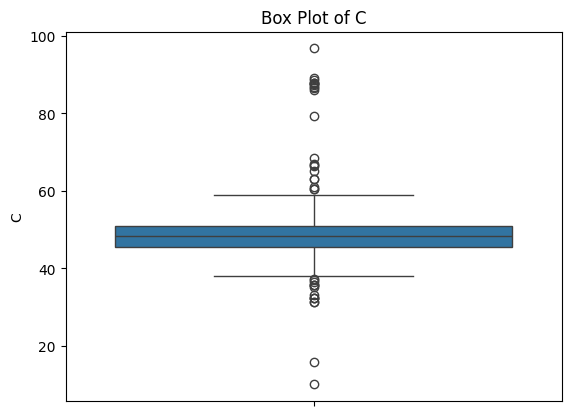

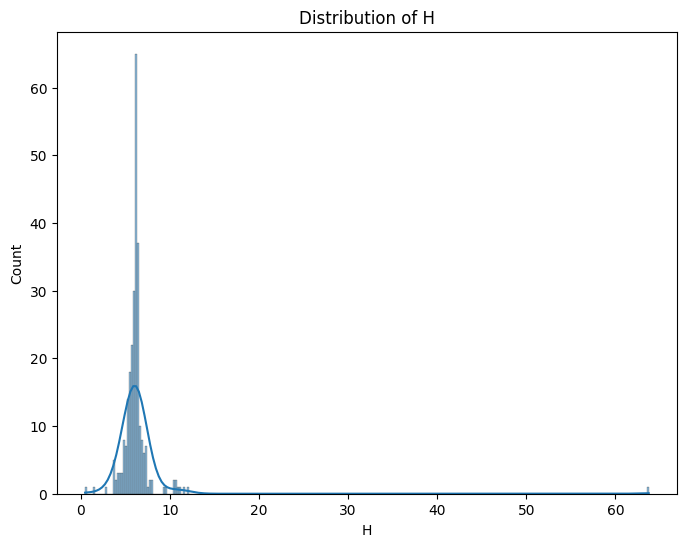

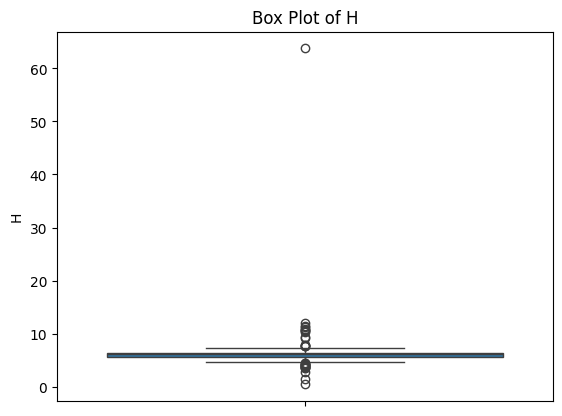

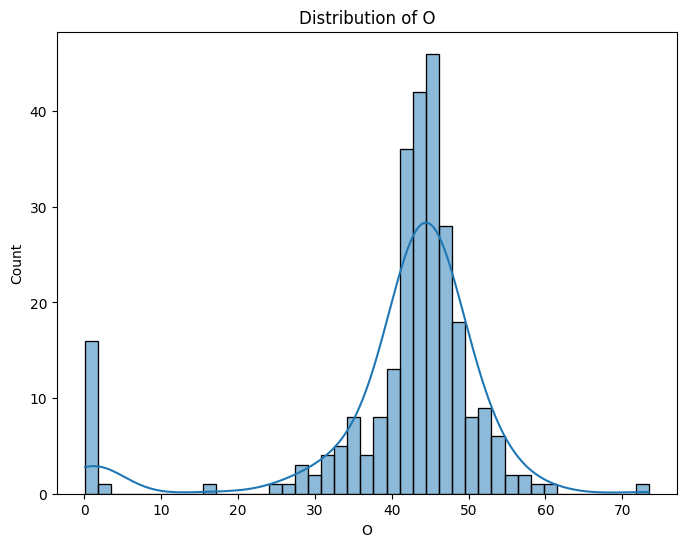

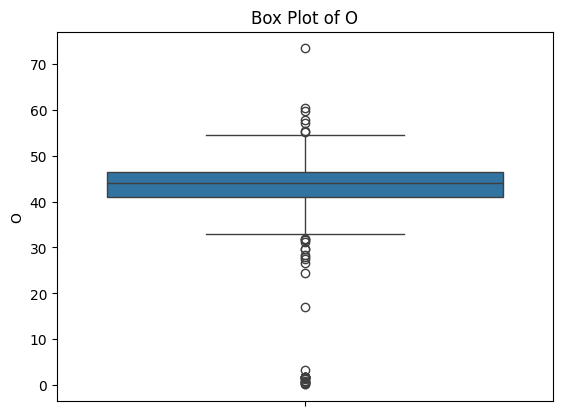

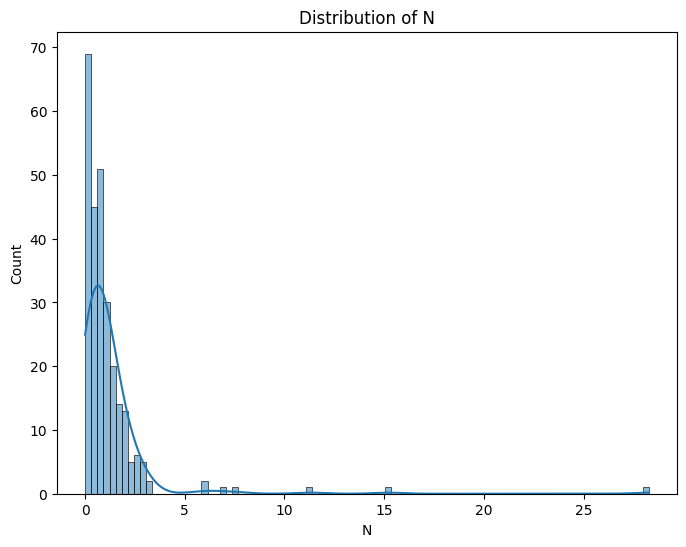

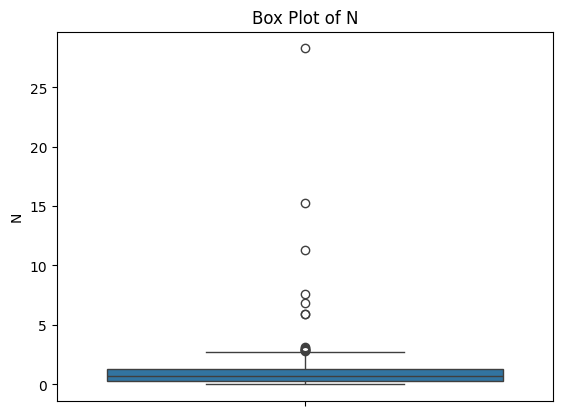

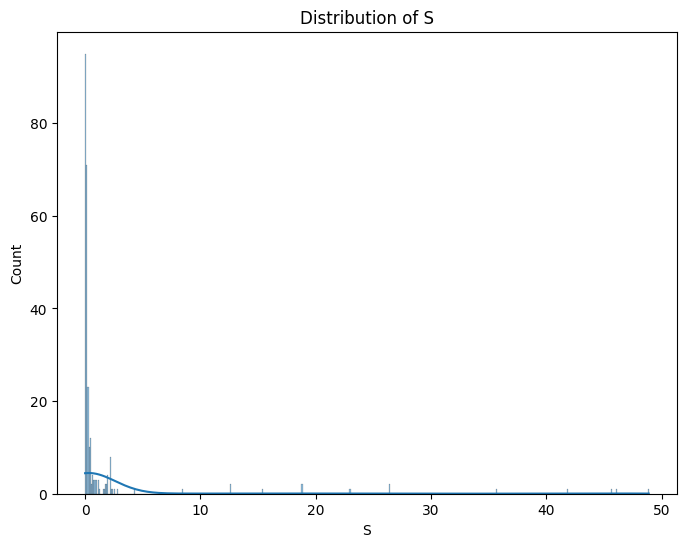

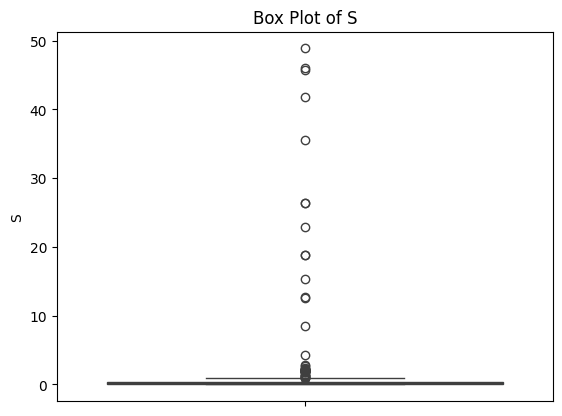

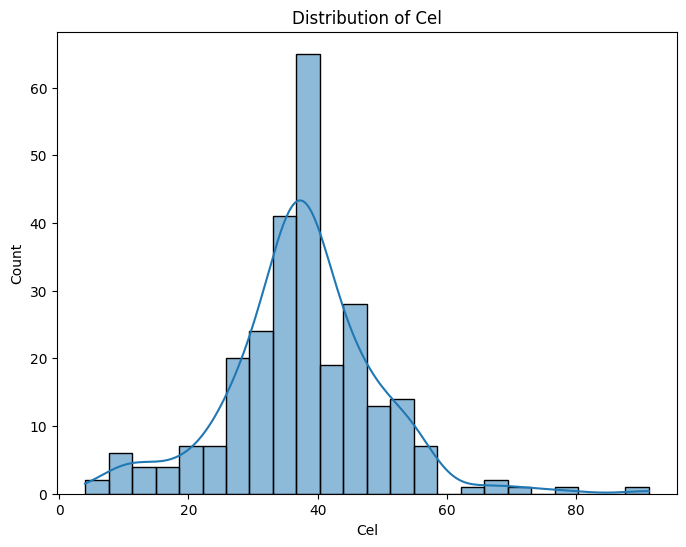

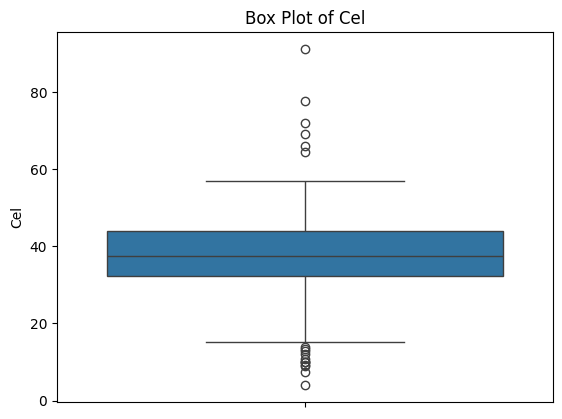

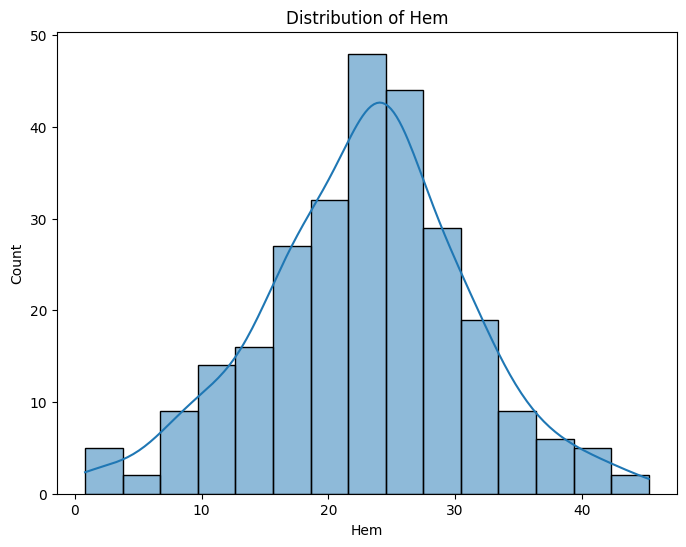

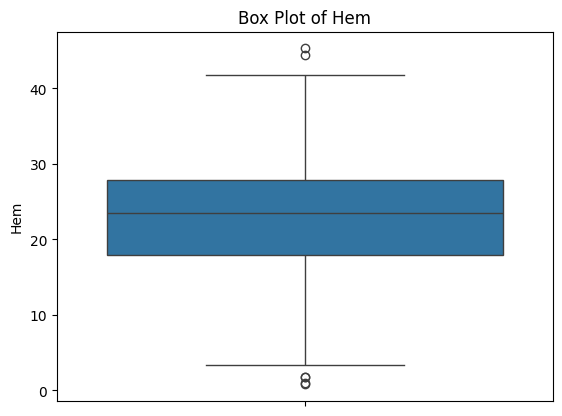

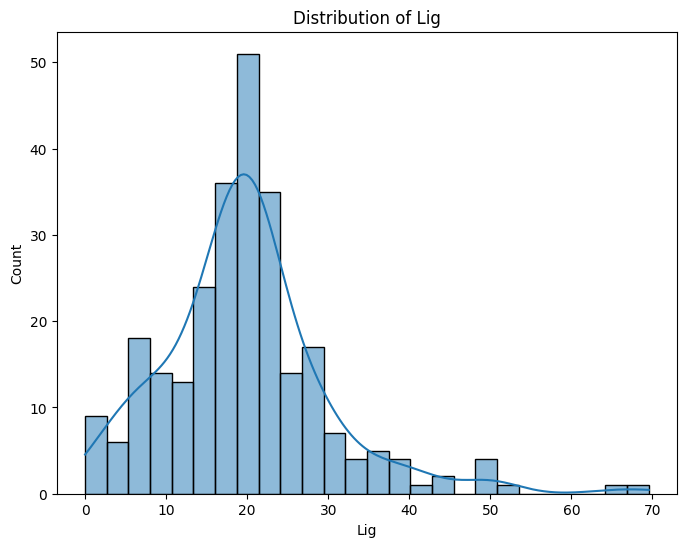

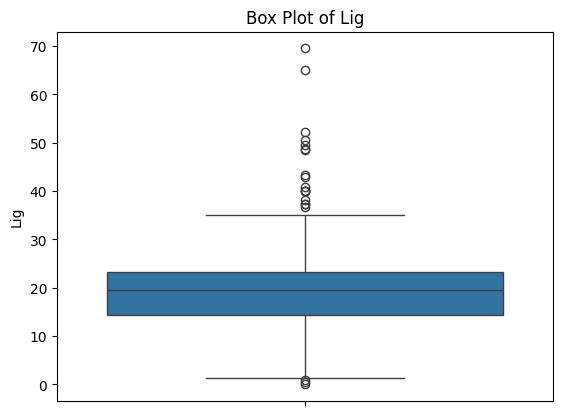

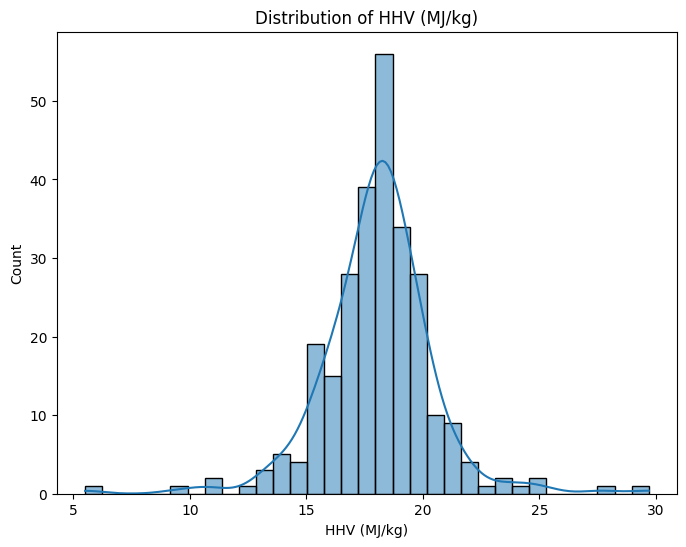

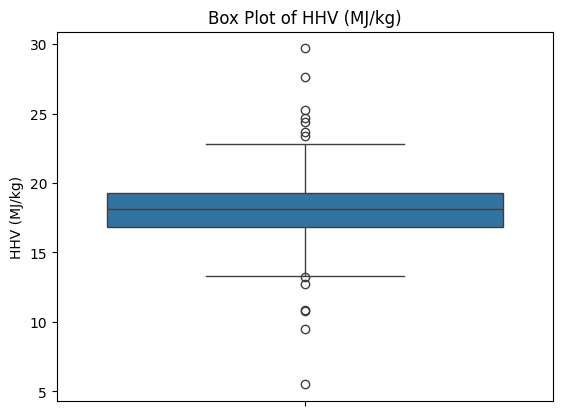

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_check:
  # Histogram
   plt.figure(figsize=(8, 6))
   sns.histplot(data[column], kde=True)
   plt.title(f'Distribution of {column}')
   plt.show()
   # Box Plot plt.figure(figsize=(8, 6))
   sns.boxplot(y=data[column])
   plt.title(f'Box Plot of {column}')
   plt.show()

In [10]:
data.isnull().sum()  # Check for missing values in each column

,0
Unnamed: 0,2
Biomass,6
ASH,0
VM,0
FC,0
C,0
H,0
O,0
N,0
S,0


In [11]:
from scipy.stats import kurtosis
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
for column in columns_to_check:
  kurt = kurtosis(data[column], fisher=False)  # Fisher=False for Pearson's kurtosis
  print(f"Kurtosis of {column}: {kurt}")
  if kurt > 3:
    print(f"{column} has heavy tails (kurtosis > 3)")

Kurtosis of ASH: 45.775559011907504
ASH has heavy tails (kurtosis > 3)
Kurtosis of VM: 11.043395164548981
VM has heavy tails (kurtosis > 3)
Kurtosis of FC: 13.299479289695146
FC has heavy tails (kurtosis > 3)
Kurtosis of C: 9.705196677131635
C has heavy tails (kurtosis > 3)
Kurtosis of H: 208.46983300240063
H has heavy tails (kurtosis > 3)
Kurtosis of O: 8.385621021045056
O has heavy tails (kurtosis > 3)
Kurtosis of N: 92.43456089099377
N has heavy tails (kurtosis > 3)
Kurtosis of S: 31.653760953771428
S has heavy tails (kurtosis > 3)
Kurtosis of Cel: 5.32199537755065
Cel has heavy tails (kurtosis > 3)
Kurtosis of Hem: 3.241629256924841
Hem has heavy tails (kurtosis > 3)
Kurtosis of Lig: 6.505382775272934
Lig has heavy tails (kurtosis > 3)
Kurtosis of HHV (MJ/kg): 8.57918740914216
HHV (MJ/kg) has heavy tails (kurtosis > 3)


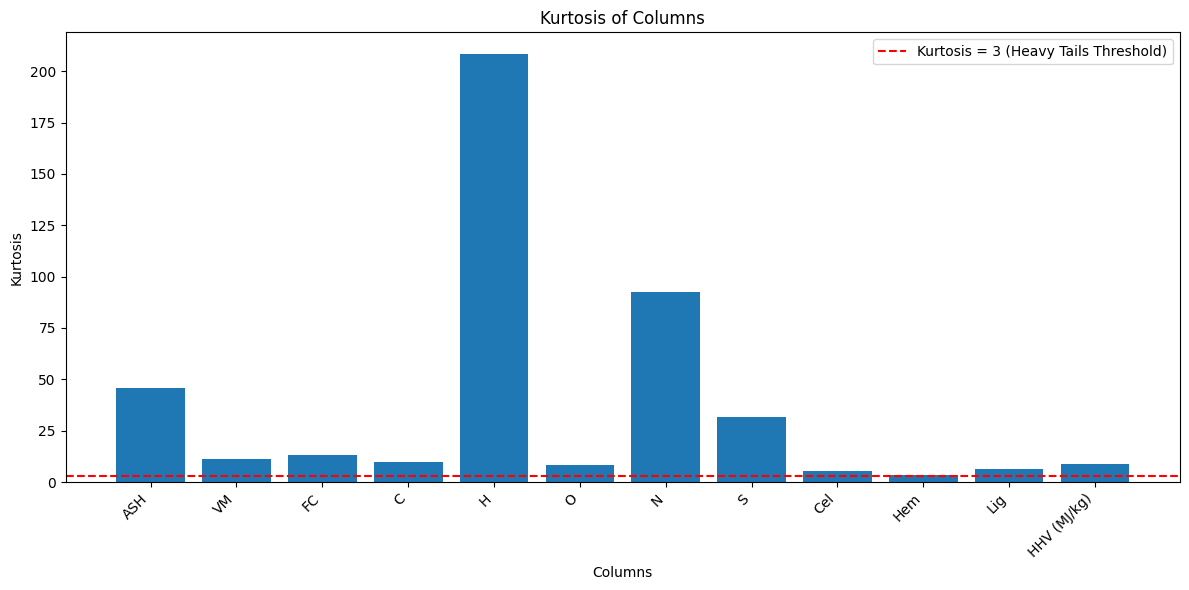

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis

columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
kurtosis_values = []

for column in columns_to_check:
    kurt = kurtosis(data[column], fisher=False)  # Fisher=False for Pearson's kurtosis
    kurtosis_values.append(kurt)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(columns_to_check, kurtosis_values)
plt.title('Kurtosis of Columns')
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.axhline(y=3, color='r', linestyle='--', label='Kurtosis = 3 (Heavy Tails Threshold)')  # Add a horizontal line at kurtosis = 3
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
#removing the heavy tail using Winsorization
from scipy.stats.mstats import winsorize

# Columns to apply Winsorization
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Apply Winsorization to each column
for column in columns_to_check:
    data[column] = winsorize(data[column], limits=[0.1, 0.1])  # Winsorize at 5% and 95% percentiles

In [14]:
#Lets check kurtosis again


In [14]:
from scipy.stats import kurtosis

columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_check:
    kurt = kurtosis(data[column], fisher=False)  # Fisher=False for Pearson's kurtosis
    print(f"Kurtosis of {column}: {kurt}")
    if kurt > 3:
        print(f"{column} still has heavy tails (kurtosis > 3)")
    else:
        print(f"{column} now has less or no heavy tails (kurtosis <=3)")

Kurtosis of ASH: 1.9966771708894195
ASH now has less or no heavy tails (kurtosis <=3)
Kurtosis of VM: 2.1557252456736076
VM now has less or no heavy tails (kurtosis <=3)
Kurtosis of FC: 2.440796263871829
FC now has less or no heavy tails (kurtosis <=3)
Kurtosis of C: 2.4293635431025464
C now has less or no heavy tails (kurtosis <=3)
Kurtosis of H: 2.401769929356204
H now has less or no heavy tails (kurtosis <=3)
Kurtosis of O: 2.825399224106282
O now has less or no heavy tails (kurtosis <=3)
Kurtosis of N: 2.2162498415427536
N now has less or no heavy tails (kurtosis <=3)
Kurtosis of S: 4.54721471475422
S still has heavy tails (kurtosis > 3)
Kurtosis of Cel: 2.1857264039458806
Cel now has less or no heavy tails (kurtosis <=3)
Kurtosis of Hem: 2.01778448852608
Hem now has less or no heavy tails (kurtosis <=3)
Kurtosis of Lig: 2.180440681365956
Lig now has less or no heavy tails (kurtosis <=3)
Kurtosis of HHV (MJ/kg): 1.9904549302820793
HHV (MJ/kg) now has less or no heavy tails (kurtosi

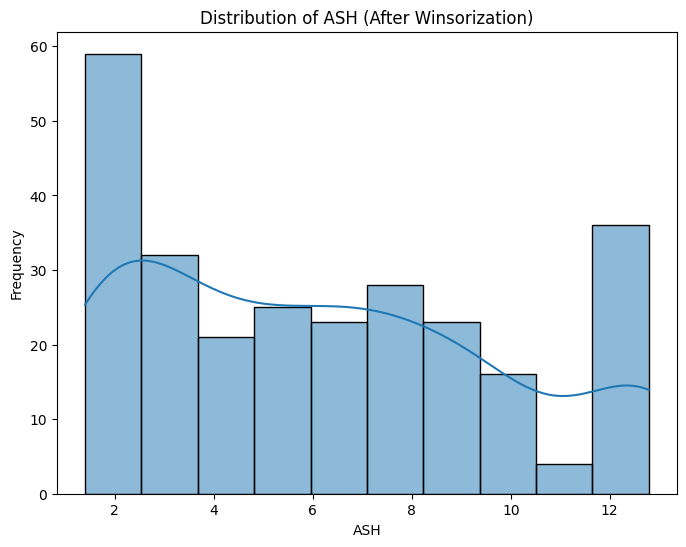

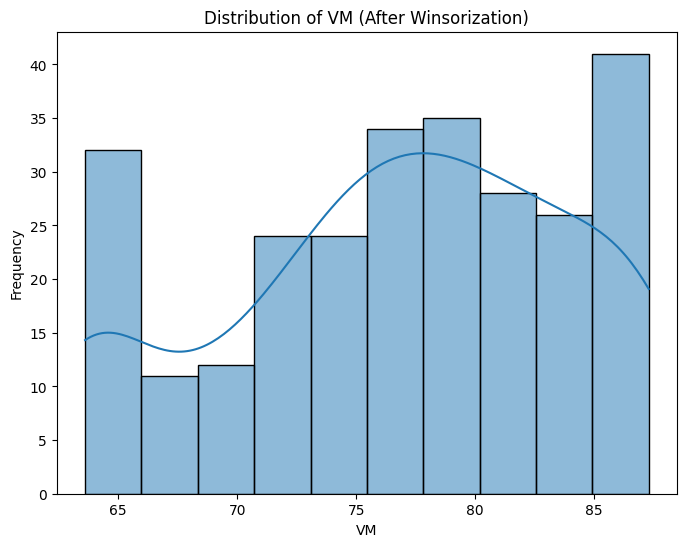

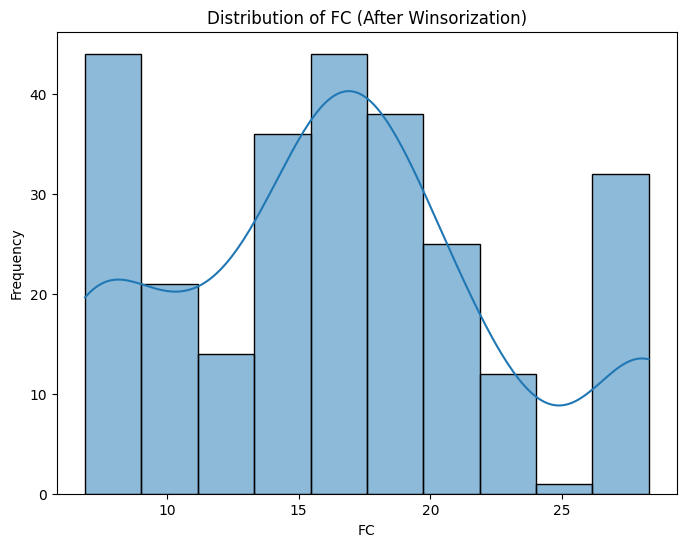

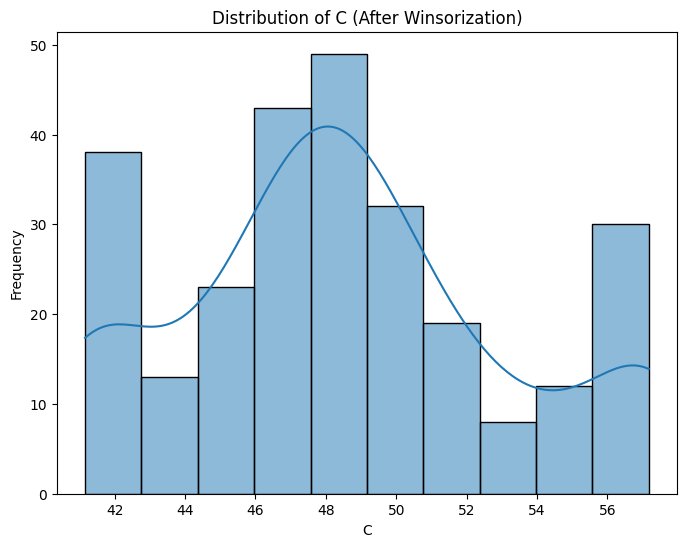

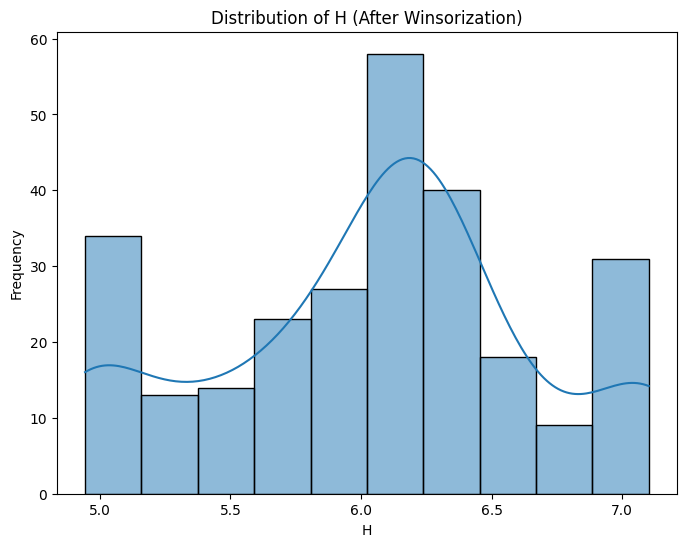

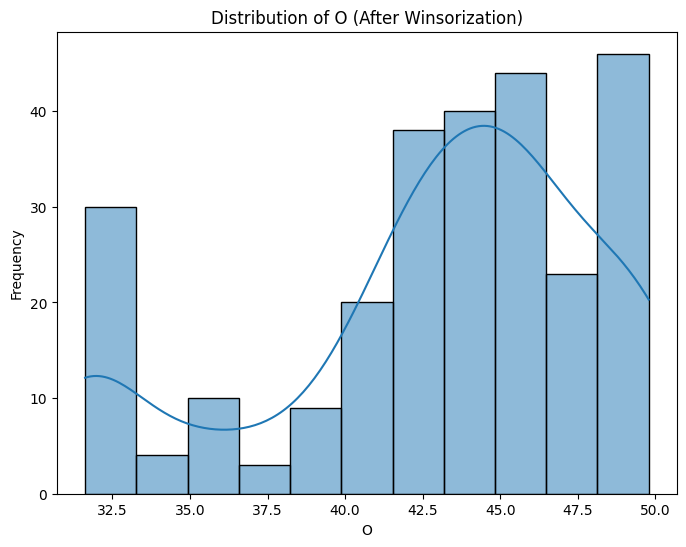

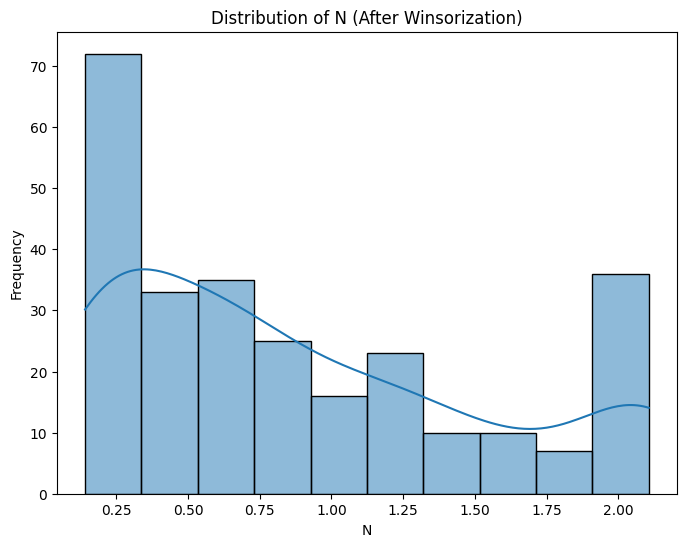

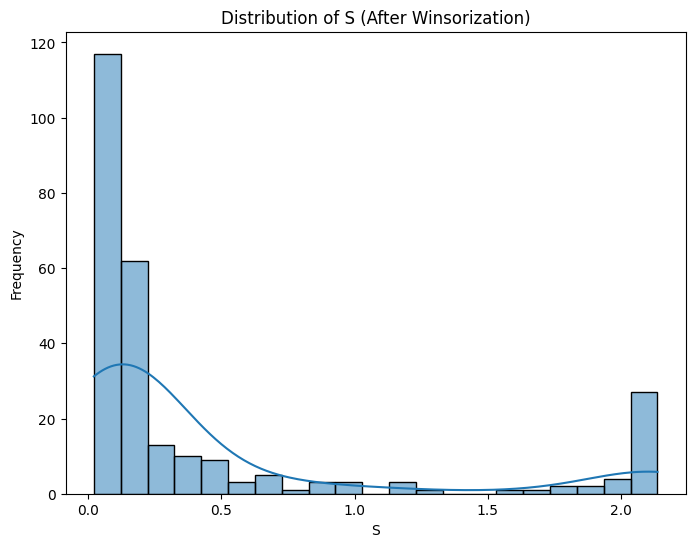

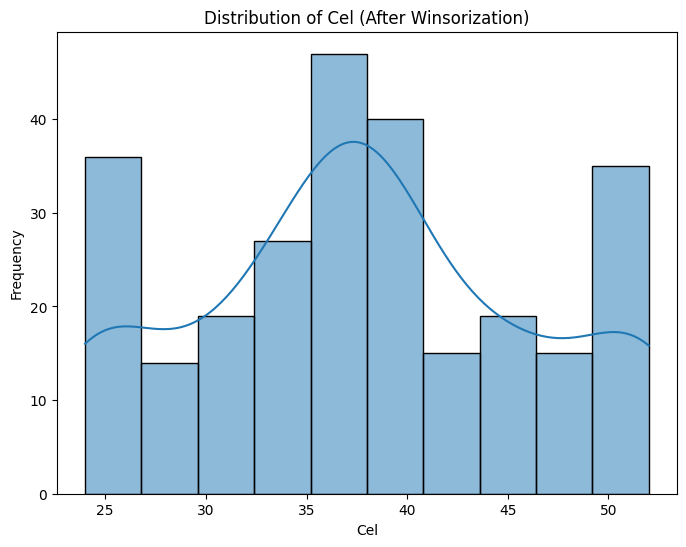

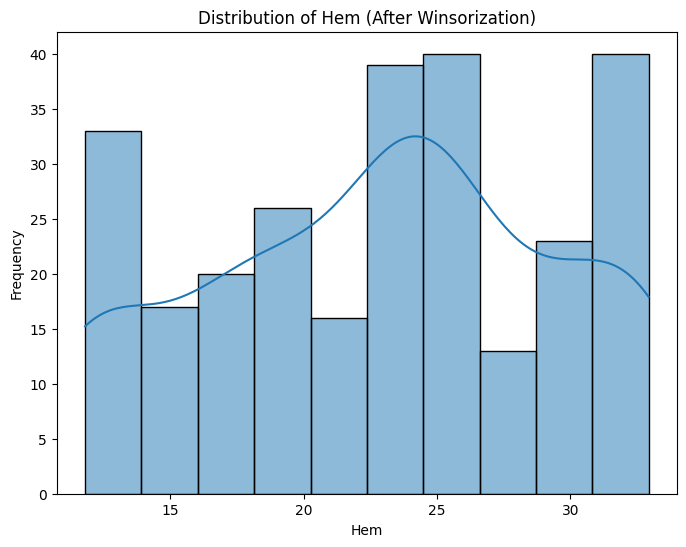

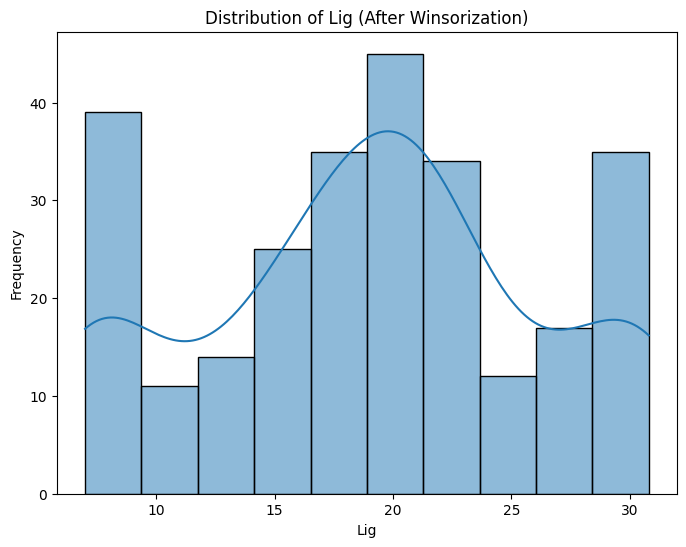

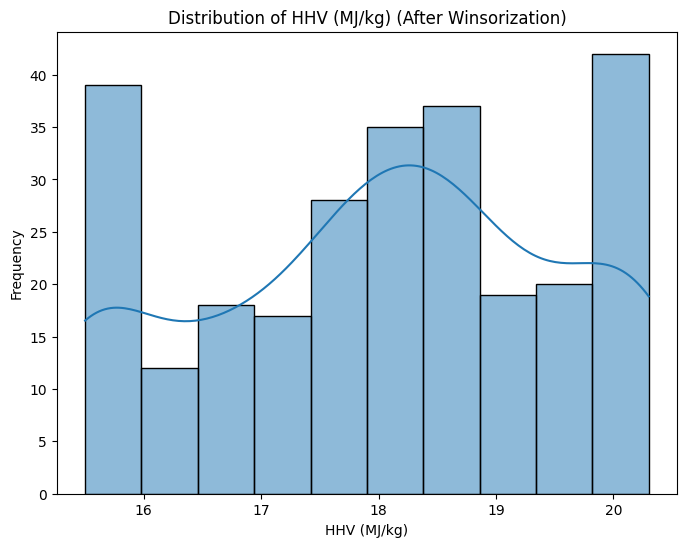

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(data[column], kde=True)  # kde=True adds a kernel density estimate curve
    plt.title(f'Distribution of {column} (After Winsorization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [17]:
#print mising values
data.isnull().sum()

,0
Unnamed: 0,2
Biomass,6
ASH,0
VM,0
FC,0
C,0
H,0
O,0
N,0
S,0


In [16]:
#print descriptive stats to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
data.describe()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

,ASH,VM,FC,C,H,O,N,S,Cel,Hem,Lig,HHV (MJ/kg)
count,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00
mean,6.17,76.78,16.42,48.45,6.04,42.91,0.88,0.46,37.78,22.88,19.02,18.03
std,3.68,7.24,6.28,4.65,0.62,5.40,0.65,0.68,8.36,6.54,7.18,1.52
min,1.40,63.61,6.89,41.16,4.94,31.62,0.14,0.02,24.00,11.80,7.00,15.50
25%,2.90,72.15,11.56,45.53,5.68,40.98,0.30,0.08,32.25,17.96,14.34,16.84
50%,5.70,77.60,16.70,48.27,6.14,44.02,0.68,0.15,37.60,23.46,19.50,18.11
75%,8.98,82.47,19.84,51.03,6.40,46.56,1.29,0.41,44.00,27.90,23.25,19.25
max,12.79,87.29,28.30,57.17,7.10,49.78,2.11,2.14,52.00,32.95,30.80,20.30


In [17]:
data.head()


,Unnamed: 0,Biomass,ASH,VM,FC,C,H,O,N,S,Cel,Hem,Lig,HHV (MJ/kg),Source
0,1.,Alfalfa Stem,5.27,78.92,15.81,50.05,6.37,40.52,2.11,0.21,35.80,18.48,23.36,18.67,[1]
1,2.,alfalfa (lucern),9.40,73.90,16.70,48.70,6.49,39.94,2.11,2.14,36.48,24.26,15.34,18.60,[2]
2,3.,alfalfa seed straw,7.25,72.60,20.15,49.80,5.75,43.37,1.06,0.02,41.65,19.39,29.16,18.45,[2]
3,4.,cotton gin trash,12.79,67.30,15.10,47.20,6.27,43.37,2.11,0.67,24.00,11.80,17.60,16.42,[2]
4,5.,cotton gin waste,9.36,82.16,8.48,54.10,5.20,38.71,1.60,0.40,52.00,16.00,7.00,16.27,[2]


In [20]:
#trying watteserian GAN

In [ ]:
#with plots
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import wasserstein_distance


# Set random seed for reproducibility
seed = 42
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)



if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

# Force deterministic algorithms
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Mount Google Drive (if needed for saving/loading models)
drive.mount('/content/drive')

# Set device for GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load your dataframe (assuming it's already loaded as `data`)

# Extract numeric columns for GAN
numeric_features = [
    'ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S',
    'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'
]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_features])

# Convert to PyTorch tensor and move to device
real_data = torch.tensor(data_scaled, dtype=torch.float32).to(device)

# Parameters
latent_dim = 12  # Latent dimension for noise
data_dim = real_data.shape[1]  # Number of features
batch_size = 64
epochs = 6000

# Define Generator
class Generator(nn.Module):
    def __init__(self, latent_dim, data_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.LeakyReLU(0.2),
            nn.Linear(256, data_dim),
            nn.ReLU(),  # We can delete this if needed
            nn.Tanh()  # Tanh activation for [-1, 1] outputs
        )

    def forward(self, z):
        return self.model(z)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, data_dim):  # Set the default data_dim to match your feature count
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(data_dim, 128),  # Map 12 -> 128
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),       # Map 128 -> 64
            nn.LeakyReLU(0.2),
            nn.LeakyReLU(0.2),#added
            nn.LeakyReLU(0.2),#added
            nn.LeakyReLU(0.2),#addded
            nn.LeakyReLU(0.2),#addded
            nn.LeakyReLU(0.2),#added

            nn.Linear(64, 1),         # Map 64 -> 1 (output score)
        )

    def forward(self, x):
        return self.model(x)

# Initialize models
generator = Generator(latent_dim, data_dim).to(device)
discriminator = Discriminator(data_dim).to(device)

# Optimizers and loss function
optimizer_G = optim.Adam(generator.parameters(), lr=0.0001, betas=(0.9, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.3, 0.999))

# Optional: Implement Learning Rate Scheduling
scheduler_G = optim.lr_scheduler.StepLR(optimizer_G, step_size=1000, gamma=0.5)
scheduler_D = optim.lr_scheduler.StepLR(optimizer_D, step_size=1000, gamma=0.5)

# Loss function: Mean Squared Error (MSE)
loss_function = nn.MSELoss()

# Store losses for plotting
d_losses = []
g_losses = []

# Training Loop
for epoch in range(epochs):
    for i in range(0, real_data.shape[0], batch_size):
        # Get real data batch
        real_batch = real_data[i:i + batch_size]
        current_batch_size = real_batch.shape[0]

        # Generate fake data
        noise = torch.randn(current_batch_size, latent_dim).to(device)
        fake_data = generator(noise)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_labels = torch.ones(current_batch_size, 1).to(device)  # Real data label = 1
        fake_labels = torch.zeros(current_batch_size, 1).to(device)  # Fake data label = 0

        # Discriminator losses for real and fake data
        real_loss = loss_function(discriminator(real_batch), real_labels)
        fake_loss = loss_function(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        fake_labels = torch.ones(current_batch_size, 1).to(device)  # Generator wants fake data to be classified as real
        g_loss = loss_function(discriminator(fake_data), fake_labels)
        g_loss.backward()
        optimizer_G.step()

    # Log losses every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

    # Store the losses for plotting
    d_losses.append(d_loss.item())
    g_losses.append(g_loss.item())

    # Optional: Apply learning rate scheduler
    scheduler_G.step()
    scheduler_D.step()

# Generate 1000 synthetic data points
noise = torch.randn(1000, latent_dim).to(device)
synthetic_data = generator(noise).detach().cpu().numpy()

# Inverse transform to original scale
synthetic_data = scaler.inverse_transform(synthetic_data)

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=numeric_features)

# Optionally, save model to Google Drive
torch.save(generator.state_dict(), '/content/drive/MyDrive/generator_regression.pth')
torch.save(discriminator.state_dict(), '/content/drive/MyDrive/discriminator_regression.pth')

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN Losses During Training')
plt.legend()
plt.show()

# Waterfall-like plot for GAN losses (step plot)
plt.figure(figsize=(10, 5))

# Create color map for the steps
colors = cm.viridis(np.linspace(0, 1, len(d_losses)))

# Plot discriminator loss as a step plot
plt.step(range(len(d_losses)), d_losses, where='mid', label="Discriminator Loss", color="r", linewidth=2)

# Plot generator loss as a step plot
plt.step(range(len(g_losses)), g_losses, where='mid', label="Generator Loss", color="b", linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Discriminator and Generator Losses - Waterfall Style Plot')
plt.legend()
plt.show()

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Vanilla GAN Losses During Training')
plt.legend()
plt.show()

# Waterfall Plot
plt.figure(figsize=(10, 5))
plt.step(range(len(d_losses)), d_losses, where='mid', label='Discriminator Loss', color='r', linewidth=2)
plt.step(range(len(g_losses)), g_losses, where='mid', label='Generator Loss', color='b', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Discriminator and Generator Losses - Waterfall Style')
plt.legend()
plt.show()

# Evaluate
real_df = pd.DataFrame(scaler.inverse_transform(real_data.cpu().numpy()), columns=numeric_features)

def compute_wasserstein_distances(real_df, synthetic_df, features):
    distances = {}
    for col in features:
        real = real_df[col].dropna()
        synth = synthetic_df[col].dropna()
        wd = wasserstein_distance(real, synth)
        distances[col] = wd
    return distances

def plot_kde_comparisons(real_df, synthetic_df, features, max_cols=3):
    num_features = len(features)
    ncols = max_cols
    nrows = int(np.ceil(num_features / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()

    for i, col in enumerate(features):
        sns.kdeplot(real_df[col], ax=axes[i], label='Real', fill=True, color='green')
        sns.kdeplot(synthetic_df[col], ax=axes[i], label='Synthetic', fill=True, color='blue')
        axes[i].set_title(f"KDE: {col}")
        axes[i].legend()

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Run evaluation
distances = compute_wasserstein_distances(real_df, synthetic_df, numeric_features)
print("\nWasserstein Distances:")
for k, v in distances.items():
    print(f"{k}: {v:.6f}")

plot_kde_comparisons(real_df, synthetic_df, numeric_features)


In [18]:
synthetic_df.head()

NameError: name 'synthetic_df' is not defined

In [19]:
# 🧬 Conditional GAN (cGAN) for Biomass Data using VM, C, HHV, Cel, Lig as condition
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import seaborn as sns

# === Setup
seed = 42
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Noise injection to improve generalization
def add_noise(tensor, std=0.03):
    return tensor + std * torch.randn_like(tensor)

# === Feature definitions
numeric_features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
conditioning_features = ['VM', 'C', 'HHV (MJ/kg)', 'Cel', 'Lig', 'O', 'FC', 'Hem']

# === Simulated data (replace with real `data` DataFrame)
np.random.seed(0)

# === Normalization
scaler = MinMaxScaler()
cond_scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_features])
cond_scaled = cond_scaler.fit_transform(data[conditioning_features])

real_data = torch.tensor(data_scaled, dtype=torch.float32).to(device)
real_cond = torch.tensor(cond_scaled, dtype=torch.float32).to(device)

# === Hyperparameters
latent_dim = 12
cond_dim = real_cond.shape[1]
data_dim = real_data.shape[1]
batch_size = 64
epochs = 1000

# === Generator
class ConditionalGenerator(nn.Module):
    def __init__(self, latent_dim, cond_dim, output_dim):
        super().__init__()
        self.struct_idx = [conditioning_features.index(f) for f in ['Cel', 'Lig', 'Hem']]
        self.rest_idx = [i for i in range(cond_dim) if i not in self.struct_idx]

        self.struct_net = nn.Sequential(
            nn.Linear(len(self.struct_idx), 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 64),
            nn.ReLU()
        )

        self.rest_net = nn.Sequential(
            nn.Linear(len(self.rest_idx), 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 64),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + 128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Sigmoid()
        )

    def forward(self, z, cond):
        struct = cond[:, self.struct_idx]
        rest = cond[:, self.rest_idx]
        s_feat = self.struct_net(struct)
        r_feat = self.rest_net(rest)
        combined = torch.cat([s_feat, r_feat], dim=1)
        return self.decoder(torch.cat([z, combined], dim=1))

# === Discriminator
class ConditionalDiscriminator(nn.Module):
    def __init__(self, input_dim, cond_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + cond_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x, cond):
        return self.model(torch.cat([x, cond], dim=1))

class FocusedDiscriminator(nn.Module):
    def __init__(self, selected_idx, cond_dim):
        super().__init__()
        self.selected_idx = selected_idx
        self.model = nn.Sequential(
            nn.Linear(len(selected_idx) + cond_dim, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x, cond):
        x_focus = x[:, self.selected_idx]
        return self.model(torch.cat([x_focus, cond], dim=1))

# === Initialize models
generator = ConditionalGenerator(latent_dim, cond_dim, data_dim).to(device)
discriminator = ConditionalDiscriminator(data_dim, cond_dim).to(device)
focused_idx = [numeric_features.index(f) for f in ['Cel', 'Lig', 'FC', 'Hem', 'O', 'VM']]
discriminator_focus = FocusedDiscriminator(focused_idx, cond_dim).to(device)

optimizer_G = optim.Adam(generator.parameters(), lr=0.0001)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)
optimizer_DF = optim.Adam(discriminator_focus.parameters(), lr=0.0002)
loss_function = nn.BCELoss()

# === Training loop
for epoch in range(epochs):
    for i in range(0, len(real_data), batch_size):
        real_batch = real_data[i:i + batch_size]
        cond_batch = add_noise(real_cond[i:i + batch_size])
        b_size = real_batch.size(0)

        real_labels = torch.ones(b_size, 1).to(device)
        fake_labels = torch.zeros(b_size, 1).to(device)

        z = torch.randn(b_size, latent_dim).to(device)
        fake = generator(z, cond_batch).detach()

        optimizer_D.zero_grad()
        d_real = discriminator(real_batch, cond_batch)
        d_fake = discriminator(fake, cond_batch)
        d_loss = loss_function(d_real, real_labels) + loss_function(d_fake, fake_labels)
        d_loss.backward()
        optimizer_D.step()

        optimizer_DF.zero_grad()
        df_real = discriminator_focus(real_batch, cond_batch)
        df_fake = discriminator_focus(fake, cond_batch)
        df_loss = loss_function(df_real, real_labels) + loss_function(df_fake, fake_labels)
        df_loss.backward()
        optimizer_DF.step()

        optimizer_G.zero_grad()
        z = torch.randn(b_size, latent_dim).to(device)
        fake = generator(z, cond_batch)
        d_fake = discriminator(fake, cond_batch)
        df_fake = discriminator_focus(fake, cond_batch)
        g_loss = loss_function(d_fake, real_labels) + 0.7 * loss_function(df_fake, real_labels)

        # === Wasserstein regularization + structure constraint
        gen_np = fake.detach().cpu().numpy()
        real_np = real_batch.detach().cpu().numpy()
        cel_idx = numeric_features.index('Cel')
        lig_idx = numeric_features.index('Lig')
        hem_idx = numeric_features.index('Hem')

        wasserstein_reg = (
            wasserstein_distance(gen_np[:, cel_idx], real_np[:, cel_idx]) +
            wasserstein_distance(gen_np[:, lig_idx], real_np[:, lig_idx])
        )
        g_loss += 0.5 * torch.tensor(wasserstein_reg, dtype=torch.float32).to(device)

        structure_sum = fake[:, cel_idx] + fake[:, lig_idx] + fake[:, hem_idx]
        constraint_penalty = torch.mean(torch.relu(structure_sum - 1.0))  # <= 100% in scaled form
        g_loss += 0.2 * constraint_penalty

        g_loss.backward()
        optimizer_G.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | D: {d_loss.item():.4f} | DF: {df_loss.item():.4f} | G: {g_loss.item():.4f}")

# === Generate synthetic data
z = torch.randn(1000, latent_dim).to(device)
idxs = torch.randint(0, real_cond.shape[0], (1000,))
cond_gen = real_cond[idxs]
synthetic = generator(z, cond_gen).detach().cpu().numpy()
synthetic = np.clip(synthetic, 0, 1)
synthetic = scaler.inverse_transform(synthetic)
synthetic_df = pd.DataFrame(synthetic, columns=numeric_features)
real_df = pd.DataFrame(scaler.inverse_transform(real_data.cpu().numpy()), columns=numeric_features)

# === Wasserstein Distance
wd = {col: wasserstein_distance(real_df[col], synthetic_df[col]) for col in numeric_features}
print("\n📏 Wasserstein Distances:\n", pd.Series(wd).sort_values(ascending=False))



Epoch 0 | D: 1.3879 | DF: 1.3841 | G: 1.4853
Epoch 10 | D: 1.3742 | DF: 1.3790 | G: 1.3946
Epoch 20 | D: 1.3693 | DF: 1.3829 | G: 1.4144
Epoch 30 | D: 1.3717 | DF: 1.3915 | G: 1.3224
Epoch 40 | D: 1.2104 | DF: 1.3674 | G: 1.4532
Epoch 50 | D: 1.6374 | DF: 1.4498 | G: 1.7464
Epoch 60 | D: 1.4706 | DF: 1.4074 | G: 1.8050
Epoch 70 | D: 1.2998 | DF: 1.3999 | G: 1.4919
Epoch 80 | D: 1.1361 | DF: 1.4038 | G: 1.4843
Epoch 90 | D: 1.3178 | DF: 1.3822 | G: 1.4893
Epoch 100 | D: 1.3383 | DF: 1.4161 | G: 1.6671
Epoch 110 | D: 1.2674 | DF: 1.4168 | G: 1.9981
Epoch 120 | D: 1.3865 | DF: 1.3902 | G: 1.8300
Epoch 130 | D: 1.7441 | DF: 1.4035 | G: 1.3111
Epoch 140 | D: 1.3655 | DF: 1.3881 | G: 1.3271
Epoch 150 | D: 0.9814 | DF: 1.3559 | G: 1.4810
Epoch 160 | D: 1.1302 | DF: 1.3696 | G: 1.6151
Epoch 170 | D: 1.2428 | DF: 1.3417 | G: 2.1018
Epoch 180 | D: 1.2842 | DF: 1.2972 | G: 1.9980
Epoch 190 | D: 1.5626 | DF: 1.3357 | G: 1.4055
Epoch 200 | D: 1.4805 | DF: 1.3030 | G: 1.3408
Epoch 210 | D: 1.3235 | 

In [20]:
print("Raw Output from Generator (normalized):")
print(generator(z, cond_gen).detach().cpu().numpy()[:5])

print("\nDenormalized Synthetic DataFrame:")
print(synthetic_df.head())


Raw Output from Generator (normalized):
[[9.9465168e-01 9.9940789e-01 4.9014670e-08 2.8255949e-05 1.9515084e-01
  9.9991095e-01 7.9040301e-01 2.2440315e-03 5.4491383e-01 8.7695760e-01
  7.1000570e-01 2.8621115e-02]
 [5.8876258e-01 5.7155803e-02 9.0894175e-01 4.0058158e-02 5.3151539e-03
  5.8564443e-02 9.9901974e-01 9.9997461e-01 9.7378021e-01 2.8790720e-02
  1.9210852e-03 4.4087863e-01]
 [4.9085450e-01 2.6650858e-01 5.9952736e-01 3.6984131e-01 2.9392481e-01
  7.5486493e-01 3.2428265e-01 6.0155004e-01 2.8642192e-01 2.3255132e-01
  8.6450440e-01 8.5561025e-01]
 [3.8777602e-01 6.0433000e-01 4.8666936e-01 5.8224541e-01 4.4816053e-01
  6.2841600e-01 3.4560987e-01 1.9166520e-01 5.3229970e-01 6.8397915e-01
  5.0540167e-01 8.4255940e-01]
 [1.3923439e-01 5.3363299e-01 5.3965575e-01 5.3604567e-01 3.0432659e-01
  6.2838620e-01 6.4665967e-01 8.2324529e-03 3.2271537e-01 3.9237955e-01
  9.2807454e-01 8.6594182e-01]]

Denormalized Synthetic DataFrame:
    ASH    VM    FC     C    H     O    N    S   

In [ ]:
synthetic_df.head()


🔁 Fold 1
🧹 Filtered synthetic samples: 89 / 89 retained.

🔁 Fold 2
🧹 Filtered synthetic samples: 89 / 89 retained.

🔁 Fold 3
🧹 Filtered synthetic samples: 89 / 89 retained.

📊 Cross-Validation Wasserstein Distance Summary:
        ASH   VM   FC    C    H    O    N    S  Cel  Hem  Lig  HHV (MJ/kg)
Fold_1 0.32 0.06 0.11 0.25 0.15 0.07 0.13 0.13 0.25 0.14 0.21         0.39
Fold_2 0.12 0.35 0.25 0.11 0.19 0.12 0.16 0.14 0.06 0.14 0.25         0.25
Fold_3 0.24 0.24 0.31 0.23 0.10 0.14 0.37 0.18 0.24 0.10 0.11         0.14

Average per feature:
ASH           0.23
VM            0.22
FC            0.23
C             0.20
H             0.15
O             0.11
N             0.22
S             0.15
Cel           0.18
Hem           0.13
Lig           0.19
HHV (MJ/kg)   0.26
dtype: float64

📊 Fold-wise Wasserstein Distances:


,ASH,VM,FC,C,H,O,N,S,Cel,Hem,Lig,HHV (MJ/kg)
Fold_1,0.32,0.06,0.11,0.25,0.15,0.07,0.13,0.13,0.25,0.14,0.21,0.39
Fold_2,0.12,0.35,0.25,0.11,0.19,0.12,0.16,0.14,0.06,0.14,0.25,0.25
Fold_3,0.24,0.24,0.31,0.23,0.10,0.14,0.37,0.18,0.24,0.10,0.11,0.14



📉 Average Wasserstein Distance per Feature:
ASH           0.23
VM            0.22
FC            0.23
C             0.20
H             0.15
O             0.11
N             0.22
S             0.15
Cel           0.18
Hem           0.13
Lig           0.19
HHV (MJ/kg)   0.26
dtype: float64


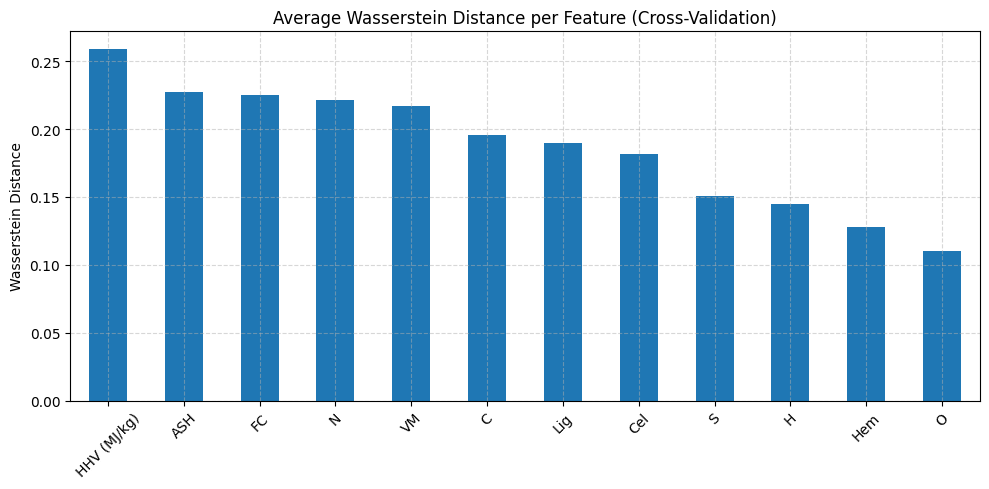

In [23]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler


def compute_wd_cv(real_np, cond_np, GeneratorClass, DiscriminatorClass, latent_dim, cond_dim, data_dim, device, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    results = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(real_np)):
        print(f"\n🔁 Fold {fold + 1}")

        X_train, X_val = real_np[train_idx], real_np[val_idx]
        C_train, C_val = cond_np[train_idx], cond_np[val_idx]

        # ✅ Fit scalers on training only (avoid leakage)
        scaler = MinMaxScaler().fit(X_train)
        cond_scaler = MinMaxScaler().fit(C_train)

        X_train_scaled = scaler.transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        C_train_scaled = cond_scaler.transform(C_train)
        C_val_scaled = cond_scaler.transform(C_val)

        # Convert to tensors
        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
        C_train_tensor = torch.tensor(C_train_scaled, dtype=torch.float32).to(device)

        G = GeneratorClass(latent_dim, cond_dim, data_dim).to(device)
        D = DiscriminatorClass(data_dim, cond_dim).to(device)
        focus_idx = [numeric_features.index(f) for f in ['Cel', 'Lig', 'FC', 'Hem', 'O', 'VM']]
        DF = FocusedDiscriminator(focus_idx, cond_dim).to(device)

        opt_G = optim.Adam(G.parameters(), lr=0.0001)
        opt_D = optim.Adam(D.parameters(), lr=0.0002)
        opt_DF = optim.Adam(DF.parameters(), lr=0.0002)
        loss_fn = nn.BCELoss()

        for epoch in range(200):
            for i in range(0, len(X_train_tensor), 64):
                xb = X_train_tensor[i:i+64]
                cb = add_noise(C_train_tensor[i:i+64])
                bs = xb.shape[0]

                real_labels = torch.ones(bs, 1).to(device)
                fake_labels = torch.zeros(bs, 1).to(device)

                z = torch.randn(bs, latent_dim).to(device)
                fake = G(z, cb)

                opt_D.zero_grad()
                d_real = D(xb, cb)
                d_fake = D(fake.detach(), cb)
                d_loss = loss_fn(d_real, real_labels) + loss_fn(d_fake, fake_labels)
                d_loss.backward()
                opt_D.step()

                opt_DF.zero_grad()
                df_real = DF(xb, cb)
                df_fake = DF(fake.detach(), cb)
                df_loss = loss_fn(df_real, real_labels) + loss_fn(df_fake, fake_labels)
                df_loss.backward()
                opt_DF.step()

                opt_G.zero_grad()
                z = torch.randn(bs, latent_dim).to(device)
                fake = G(z, cb)
                d_fake = D(fake, cb)
                df_fake = DF(fake, cb)
                g_loss = loss_fn(d_fake, real_labels) + 0.7 * loss_fn(df_fake, real_labels)

                gen_np = fake.detach().cpu().numpy()
                real_np_batch = xb.detach().cpu().numpy()
                cel_idx = numeric_features.index('Cel')
                lig_idx = numeric_features.index('Lig')
                hem_idx = numeric_features.index('Hem')

                wasserstein_reg = (
                    wasserstein_distance(gen_np[:, cel_idx], real_np_batch[:, cel_idx]) +
                    wasserstein_distance(gen_np[:, lig_idx], real_np_batch[:, lig_idx])
                )
                g_loss += 0.5 * torch.tensor(wasserstein_reg, dtype=torch.float32).to(device)

                structure_sum = fake[:, cel_idx] + fake[:, lig_idx] + fake[:, hem_idx]
                g_loss += 0.2 * torch.mean(torch.relu(structure_sum - 1.0))

                g_loss.backward()
                opt_G.step()

        # === Validation
        z_val = torch.randn(len(X_val_scaled), latent_dim).to(device)
        C_val_tensor = torch.tensor(C_val_scaled, dtype=torch.float32).to(device)
        fake_val = G(z_val, C_val_tensor).detach().cpu().numpy()
        fake_val = np.clip(fake_val, 0, 1)

        fake_val_df = pd.DataFrame(scaler.inverse_transform(fake_val), columns=numeric_features)
        real_val_df = pd.DataFrame(X_val, columns=numeric_features)  # original unscaled X_val

        for col in numeric_features:
            min_val, max_val = real_val_df[col].min(), real_val_df[col].max()
            fake_val_df = fake_val_df[(fake_val_df[col] >= min_val) & (fake_val_df[col] <= max_val)]

        print(f"🧹 Filtered synthetic samples: {len(fake_val_df)} / {len(X_val)} retained.")
        wd_fold = [wasserstein_distance(real_val_df[c], fake_val_df[c]) for c in numeric_features]
        results.append(wd_fold)

    wd_df = pd.DataFrame(results, columns=numeric_features, index=[f"Fold_{i+1}" for i in range(folds)])
    print("\n📊 Cross-Validation Wasserstein Distance Summary:")
    print(wd_df.round(2))
    print("\nAverage per feature:")
    print(wd_df.mean().round(2))
    return wd_df
# Run the cross-validation function
wd_df = compute_wd_cv(
    real_data.cpu().numpy(),
    real_cond.cpu().numpy(),
    ConditionalGenerator,
    ConditionalDiscriminator,
    latent_dim,
    cond_dim,
    data_dim,
    device,
    folds=3  # or 5
)

# Display table of Wasserstein distances per fold
print("\n📊 Fold-wise Wasserstein Distances:")
display(wd_df.round(2))

# Display average per feature
print("\n📉 Average Wasserstein Distance per Feature:")
print(wd_df.mean().round(2))

# Optional: Plot
import matplotlib.pyplot as plt

wd_df.mean().sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Average Wasserstein Distance per Feature (Cross-Validation)")
plt.ylabel("Wasserstein Distance")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [24]:
#descriptive statistics for synthetic data
synthetic_df.describe()

,ASH,VM,FC,C,H,O,N,S,Cel,Hem,Lig,HHV (MJ/kg)
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,7.01,76.44,15.99,48.49,5.71,43.03,0.78,0.62,37.71,23.04,19.44,18.12
std,3.61,7.16,6.07,4.64,0.46,5.36,0.59,0.85,8.18,6.34,7.19,1.48
min,1.60,63.69,6.89,41.16,4.96,31.70,0.14,0.02,24.15,12.06,7.00,15.51
25%,3.72,71.38,11.38,45.62,5.42,40.73,0.27,0.02,31.44,17.66,15.25,16.93
50%,6.38,76.28,15.89,48.25,5.68,44.41,0.58,0.05,37.72,23.57,20.50,18.41
75%,10.40,82.26,19.29,51.35,5.86,46.73,1.13,1.43,43.55,28.59,24.78,19.40
max,12.78,87.29,28.28,57.10,7.07,49.78,2.11,2.14,51.85,32.68,30.65,20.27


In [ ]:
from scipy.stats import wasserstein_distance

# Apply Wasserstein distance for each feature
for feature in numeric_features:
    real_data_feature = data[feature]
    synthetic_data_feature = synthetic_df[feature]
    distance = wasserstein_distance(real_data_feature, synthetic_data_feature)
    print(f"{feature}: Wasserstein Distance = {distance}")


In [ ]:
#handling categorical values
import numpy as np

# Sample categorical features
synthetic_df['Biomass'] = np.random.choice(
    data['Biomass'].unique(), size=1000, replace=True
)
synthetic_df['Source'] = np.random.choice(
    data['Source'].unique(), size=1000, replace=True
)


In [ ]:
#chck for missing values
#synthetic_df.isnull().sum()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data (important for PCA)
scaler = StandardScaler()
numeric_features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
# Scaling the real and synthetic datasets
real_data_scaled = scaler.fit_transform(data[numeric_features])
synthetic_data_scaled = scaler.fit_transform(synthetic_df[numeric_features])

# Perform PCA (using all components to examine cumulative variance)
pca_real = PCA().fit(real_data_scaled)
pca_synthetic = PCA().fit(synthetic_data_scaled)

# Explained variance ratio (individual variance explained by each component)
explained_variance_real = pca_real.explained_variance_ratio_
explained_variance_synthetic = pca_synthetic.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance_real = explained_variance_real.cumsum()
cumulative_variance_synthetic = explained_variance_synthetic.cumsum()

# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_real) + 1), cumulative_variance_real, label='Real Data', color='blue')
plt.plot(range(1, len(cumulative_variance_synthetic) + 1), cumulative_variance_synthetic, label='Synthetic Data', color='red')

# Customize the plot
plt.title('Cumulative Explained Variance - Real vs Synthetic Data')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns

# Calculate correlation matrices
real_corr = pd.DataFrame(real_data_scaled, columns=numeric_features).corr()
synthetic_corr = pd.DataFrame(synthetic_data_scaled, columns=numeric_features).corr()

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(real_corr, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix of Real Data')

sns.heatmap(synthetic_corr, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix of Synthetic Data')

plt.tight_layout()
plt.show()


In [ ]:
!pip install minisom


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

# Assume real_data and synthetic_data are already loaded and numeric

# Step 1: Scale the datasets
#scaler = StandardScaler()
#real_data_scaled = scaler.fit_transform(data)
#synthetic_data_scaled = scaler.fit_transform(synthetic_data)

# Step 2: Train SOM for Real Data
som_real = MiniSom(10, 10, real_data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som_real.train_random(real_data_scaled, 100)

# Step 3: Train SOM for Synthetic Data
som_synthetic = MiniSom(10, 10, synthetic_data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som_synthetic.train_random(synthetic_data_scaled, 100)

# Step 4: Map Real Data Points to SOM grid (for both datasets)
real_winners = np.array([som_real.winner(data) for data in real_data_scaled])  # Winning neurons for real data
synthetic_winners = np.array([som_synthetic.winner(data) for data in synthetic_data_scaled])  # Winning neurons for synthetic data

# Step 5: Visualization (Compare the two datasets)
plt.figure(figsize=(10, 8))

# Plot real data as blue dots
plt.scatter(real_winners[:, 0], real_winners[:, 1], color='blue', label='Real Data', alpha=0.5)

# Plot synthetic data as red dots
plt.scatter(synthetic_winners[:, 0], synthetic_winners[:, 1], color='red', label='Synthetic Data', alpha=0.5)

# Add titles and labels
plt.title('Comparison of Real vs Synthetic Data on SOM Grid')
plt.xlabel('SOM Grid X')
plt.ylabel('SOM Grid Y')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean values for each feature
real_mean = data[numeric_features].mean()
synthetic_mean = synthetic_df[numeric_features].mean()

# Create radar chart
categories = numeric_features
N = len(categories)

real_values = real_mean.values
synthetic_values = synthetic_mean.values

# Define the angle for each feature
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Repeat the first value to close the radar chart
real_values = np.concatenate((real_values, [real_values[0]]))
synthetic_values = np.concatenate((synthetic_values, [synthetic_values[0]]))
angles += angles[:1]

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Fill the areas with colors
ax.fill(angles, real_values, color='deepskyblue', alpha=0.6, label='Real Data')
ax.fill(angles, synthetic_values, color='orange', alpha=0.6, label='Synthetic Data')

# Add a dashed outline for distinction
ax.plot(angles, real_values, color='deepskyblue', linewidth=2, linestyle='dashed')
ax.plot(angles, synthetic_values, color='orange', linewidth=2, linestyle='dashed')

# Hide the radial ticks
ax.set_yticklabels([])

# Set the angles and labels for each category
ax.set_xticks(angles[:-1])  # Removing the last duplicate angle
ax.set_xticklabels(categories, rotation=45, horizontalalignment='right')

# Add the title and legend
plt.title('Radar Chart Comparison of Real and Synthetic Data', fontsize=14)
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [ ]:
synthetic_df.to_csv('synthetic_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('synthetic_data.csv')

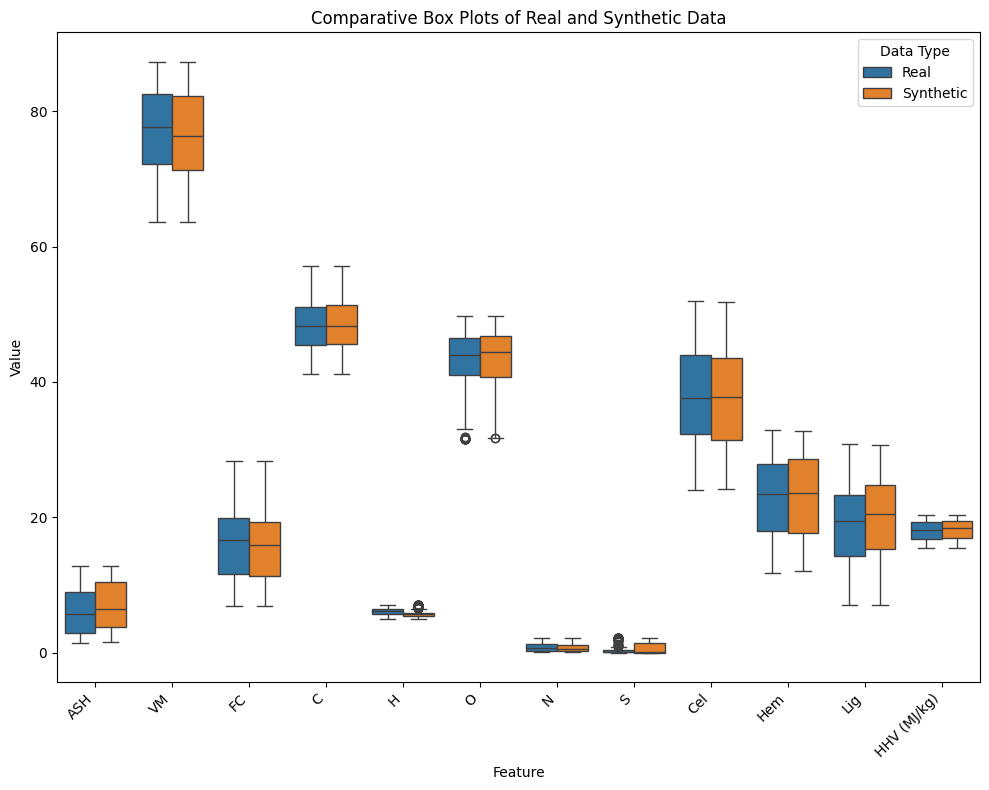

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the dataframes to long format for easier plotting
real_data_melt = pd.melt(data, value_vars=['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'], var_name='Feature', value_name='Value')
synthetic_data_melt = pd.melt(synthetic_df, value_vars=['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'], var_name='Feature', value_name='Value')

# Concatenate the melted dataframes and add a 'Data Type' column
real_data_melt['Data Type'] = 'Real'
synthetic_data_melt['Data Type'] = 'Synthetic'
all_data_melt = pd.concat([real_data_melt, synthetic_data_melt])

# Create the box plot
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.boxplot(x='Feature', y='Value', hue='Data Type', data=all_data_melt)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Comparative Box Plots of Real and Synthetic Data')
plt.tight_layout()
plt.show()

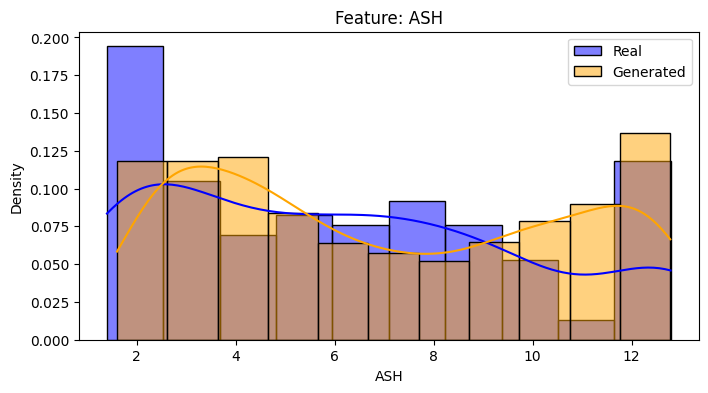

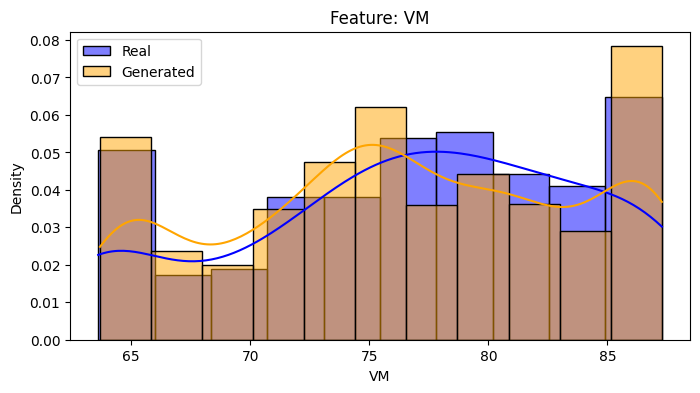

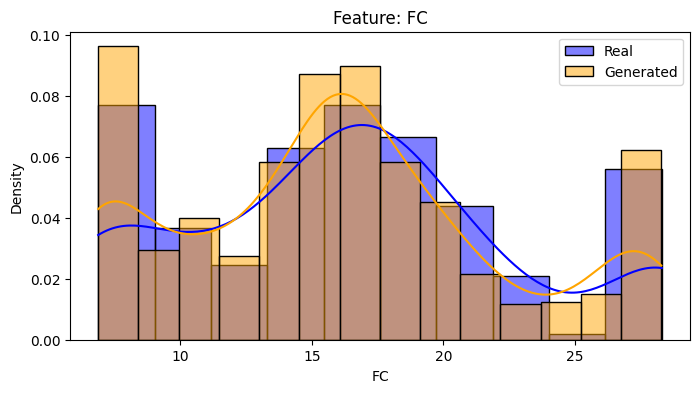

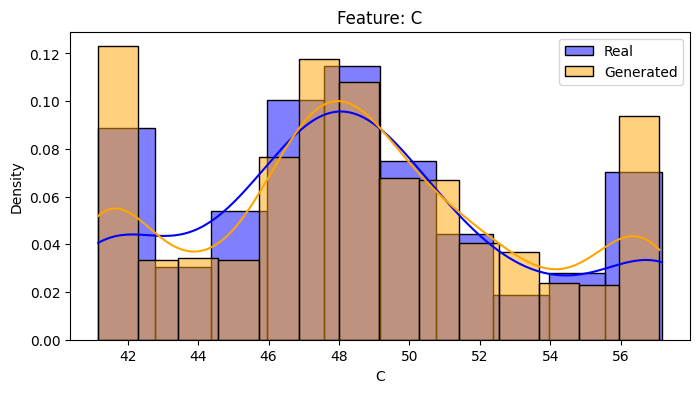

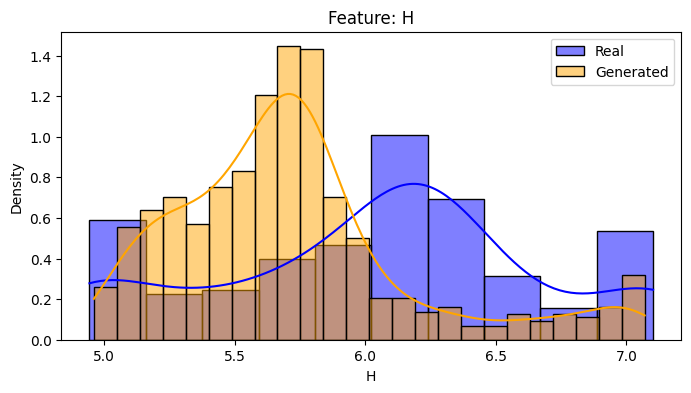

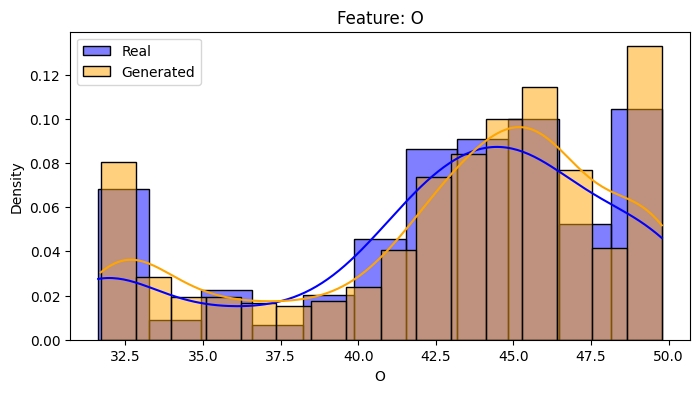

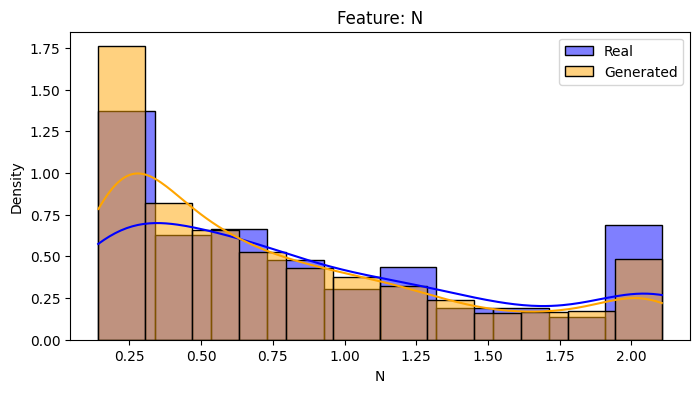

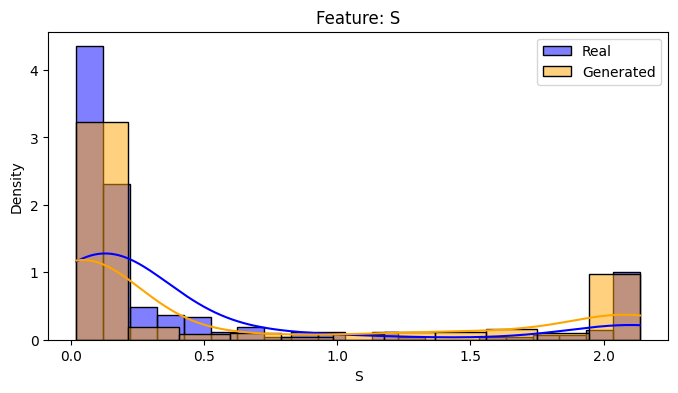

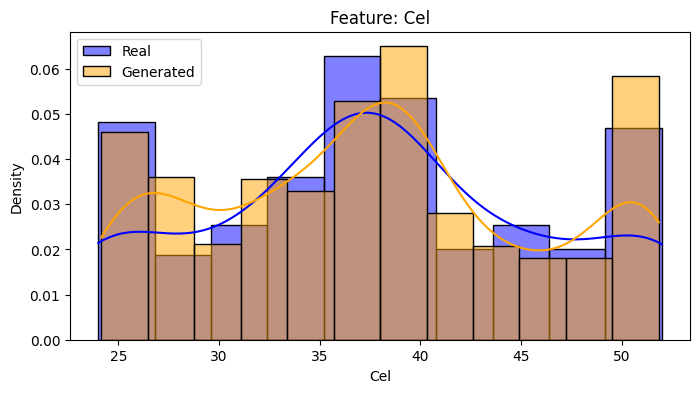

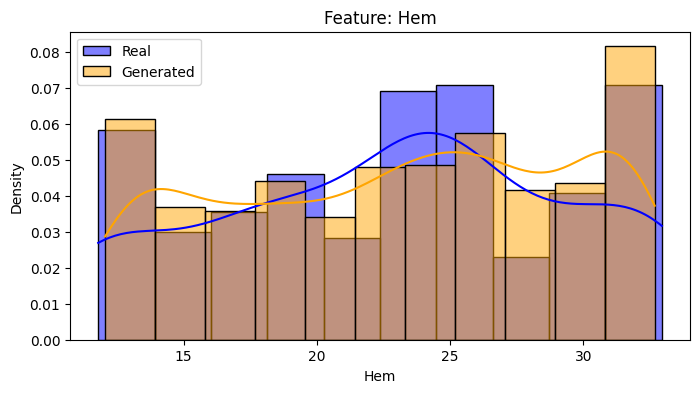

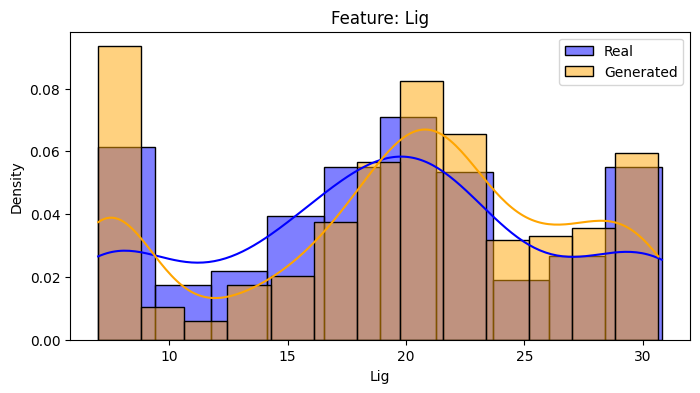

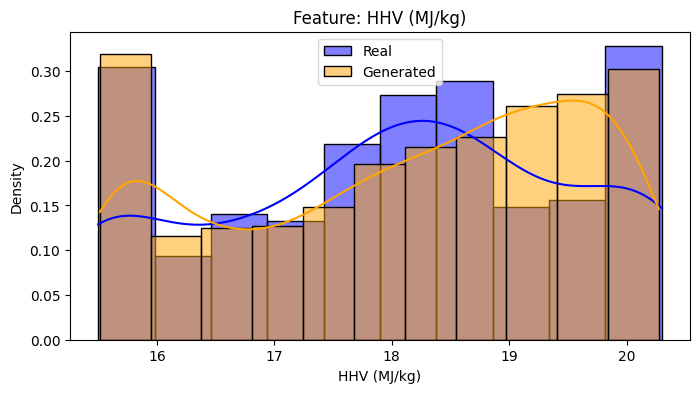

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in synthetic_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], color='blue', label='Real', kde=True, stat="density")
    sns.histplot(synthetic_df[column], color='orange', label='Generated', kde=True, stat="density")
    plt.title(f"Feature: {column}")
    plt.legend()
    plt.show()


**Regression Plots:**
Purpose: To visualize the relationship between two variables and identify potential predictors (features) for your target variable (HHV in this case). Reasoning: By observing the trend and scatter of points in the regression plot, you can get an idea of the strength and direction of the relationship between the two variables. A clear trend suggests a strong predictive relationship.

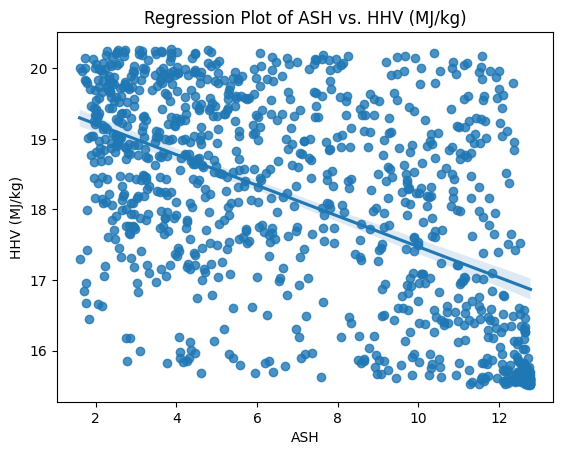

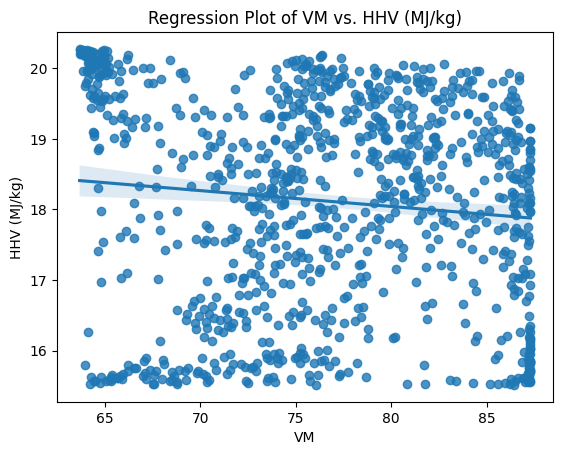

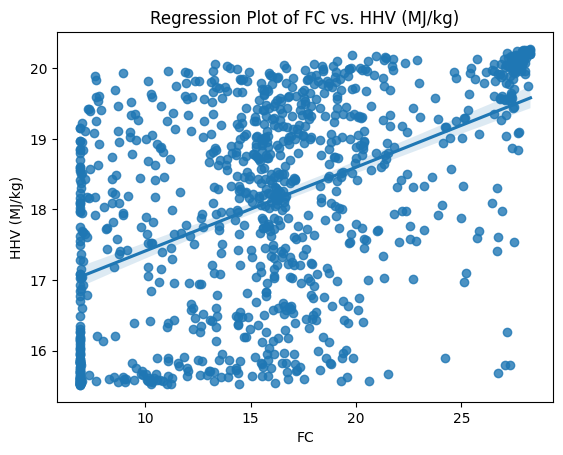

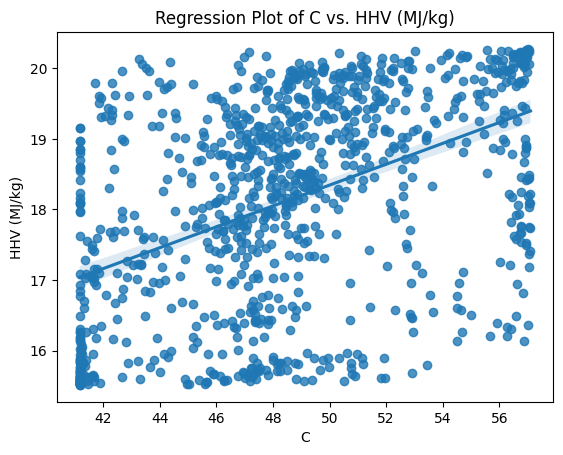

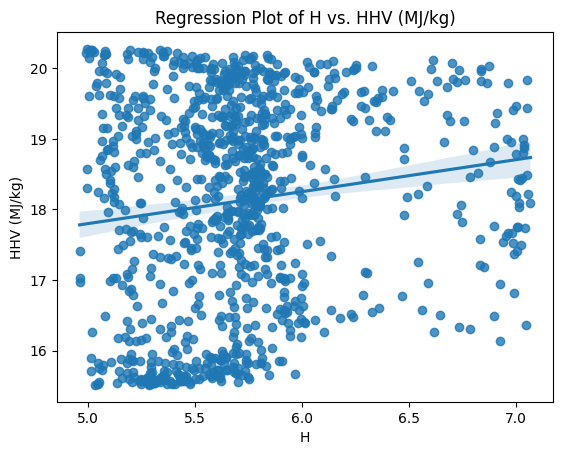

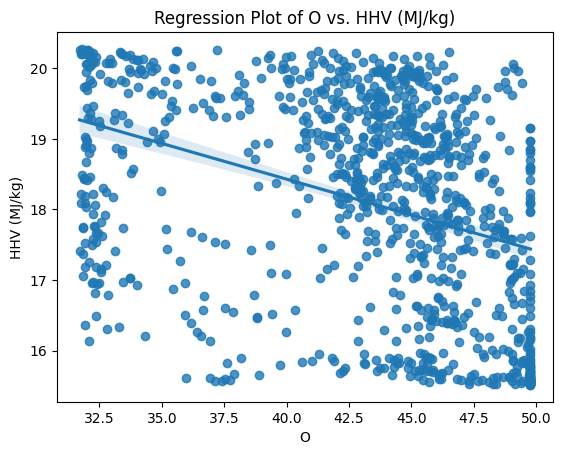

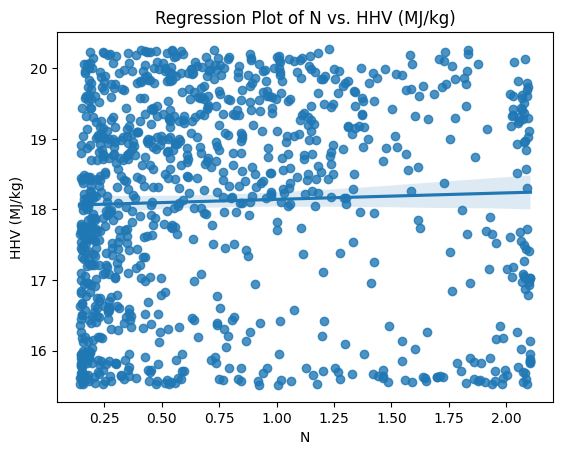

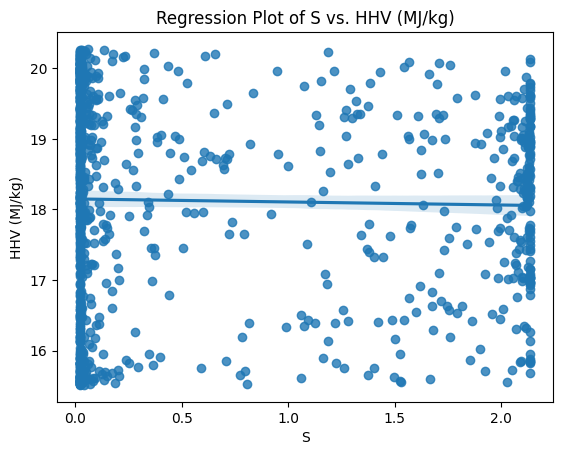

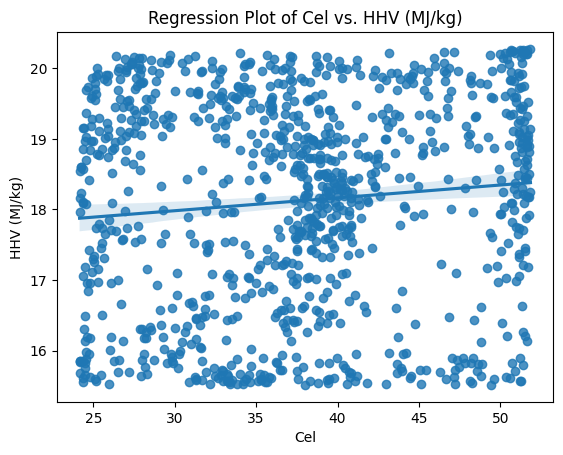

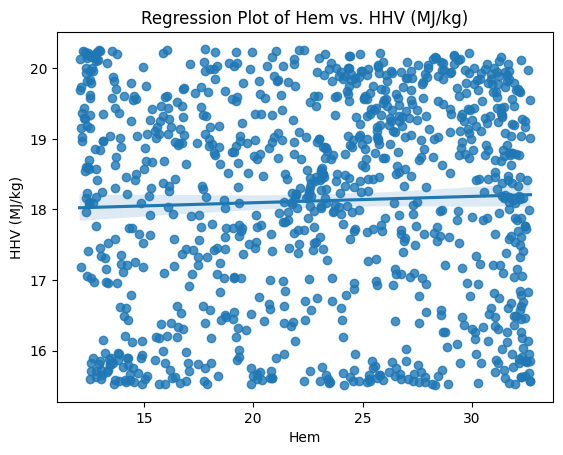

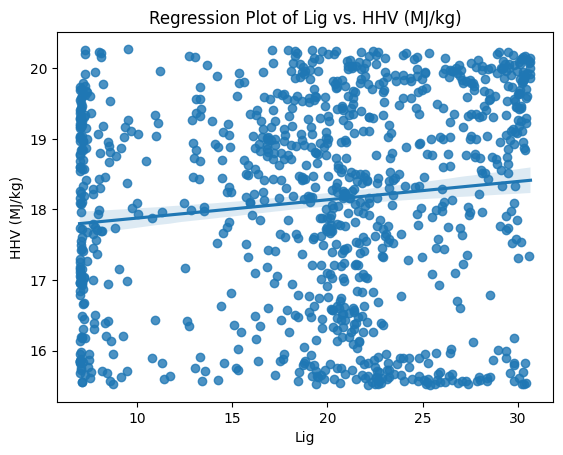

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot against 'HHV (MJ/kg)'
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']

# Loop through each column and create a regression plot
for column in columns_to_plot:
    sns.regplot(x=column, y='HHV (MJ/kg)', data=synthetic_df)
    plt.title(f'Regression Plot of {column} vs. HHV (MJ/kg)')  # Dynamic title
    plt.show()


**Step 1: Model Training, Cross-Validation, and Evaluation**

In [ ]:
!pip install tf-keras==2.18.0

In [ ]:
#!pip install tensorflow
#pip install --upgrade tensorflow
!pip install tensorflow --upgrade


In [25]:
import xgboost as xgb
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
import tensorflow as tf
from sklearn.model_selection import GridSearchCV


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load datasets
real_data = data
synthetic_data = synthetic_df

# Define features and targets
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
targets = ['Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Split real data into training and testing sets
X_real = real_data[features]
y_real = real_data[targets]
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# Split synthetic data into training and testing sets
X_synthetic = synthetic_data[features]
y_synthetic = synthetic_data[targets]
X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(
    X_synthetic, y_synthetic, test_size=0.3, random_state=42)


In [31]:
synthetic_df.head()

,ASH,VM,FC,C,H,O,N,S,Cel,Hem,Lig,HHV (MJ/kg)
0,12.74,87.23,6.89,41.16,5.30,49.77,2.05,0.08,37.90,31.90,22.49,15.77
1,10.07,64.66,26.67,42.19,5.00,32.63,2.09,2.14,47.80,13.70,8.08,18.30
2,4.56,68.72,22.72,47.96,5.49,43.85,0.98,0.05,28.29,16.09,30.17,19.44
3,5.93,78.09,15.63,51.76,6.19,41.50,0.75,0.11,39.05,26.52,17.73,19.64
4,2.95,75.36,19.08,48.93,5.60,43.76,1.00,0.11,35.90,19.04,28.50,19.56


In [ ]:
!pip install optuna


In [ ]:
# 📦 Libraries
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# ✅ Feature/target setup
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'
real_df = data
synthetic_cleaned = synthetic_df

# ✅ Combine real and cleaned synthetic data
combined_df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]], ignore_index=True).dropna()
combined_df['log_HHV'] = np.log1p(combined_df[target])  # Log-transform

# ✅ Train-test split
X = combined_df[features]
y = combined_df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP Feature Selection (Top 8)
xgb_shap = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_shap.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_shap)
shap_values = explainer(X_train_scaled)
shap_importance = np.abs(shap_values.values).mean(axis=0)

top_k = 8  # Increase number of features
selected_features = pd.Series(shap_importance, index=X.columns).sort_values(ascending=False).index[:top_k].tolist()
print("Selected Features:", selected_features)

# ✅ Filter and scale selected features
X_train_top = scaler.fit_transform(X_train[selected_features])
X_test_top = scaler.transform(X_test[selected_features])

# ✅ Optuna tuning with 5-fold CV
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
    }
    model = XGBRegressor(objective='reg:squarederror', random_state=42, **params)
    score = cross_val_score(model, X_train_top, y_train, cv=5, scoring='r2', n_jobs=-1)
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# ✅ Train final model
best_params = study.best_params
final_model = XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
final_model.fit(X_train_top, y_train)

# ✅ Predict & inverse transform
y_pred_log = final_model.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# ✅ Evaluation
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 Final HHV Prediction Results:")
print(f"Best Params: {best_params}")
print(f"R²:  {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")


In [ ]:
# 📦 Libraries
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ✅ Inputs (replace with actual DataFrames if needed)
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'
real_df = data
synthetic_cleaned = synthetic_df


# ✅ Combine real and synthetic cleaned data
combined_df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]], ignore_index=True).dropna()
combined_df['log_HHV'] = np.log1p(combined_df[target])  # Log-transform

# ✅ Split & scale
X = combined_df[features]
y = combined_df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP Selection
xgb_shap = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_shap.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_shap)
shap_values = explainer(X_train_scaled)
shap_importance = np.abs(shap_values.values).mean(axis=0)
top_k = 8
selected_features = pd.Series(shap_importance, index=X.columns).sort_values(ascending=False).index[:top_k].tolist()

X_train_top = scaler.fit_transform(X_train[selected_features])
X_test_top = scaler.transform(X_test[selected_features])

# ✅ XGBoost Ensemble Models
xgb1 = XGBRegressor(n_estimators=1473, learning_rate=0.013, max_depth=16, subsample=0.78,
                    colsample_bytree=0.84, gamma=0.0015, reg_alpha=0.25, reg_lambda=0.4,
                    objective='reg:squarederror', random_state=42)

xgb2 = XGBRegressor(n_estimators=1000, learning_rate=0.08, max_depth=6, subsample=0.85,
                    colsample_bytree=0.75, gamma=0.005, reg_alpha=0.3, reg_lambda=0.5,
                    objective='reg:squarederror', random_state=24)

xgb3 = XGBRegressor(n_estimators=1800, learning_rate=0.2, max_depth=10, subsample=0.7,
                    colsample_bytree=0.8, gamma=0.002, reg_alpha=0.2, reg_lambda=0.6,
                    objective='reg:squarederror', random_state=99)

ensemble_model = VotingRegressor(estimators=[
    ('xgb1', xgb1),
    ('xgb2', xgb2),
    ('xgb3', xgb3)
])

# ✅ Train and Evaluate
ensemble_model.fit(X_train_top, y_train)
y_pred_log = ensemble_model.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 Final HHV Prediction Results (XGBoost Ensemble):")
print(f"R²:  {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")


In [ ]:
# 📦 Libraries
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ✅ Define your real and cleaned synthetic data
# Replace these with your actual loaded DataFrames
real_df = data
synthetic_cleaned = synthetic_df

# ✅ Columns
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'

# ✅ Combine and log-transform
combined_df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]], ignore_index=True).dropna()
combined_df['log_HHV'] = np.log1p(combined_df[target])

# ✅ Split & scale
X = combined_df[features]
y = combined_df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP feature selection (Top 8)
xgb_base = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_base.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_base)
shap_values = explainer(X_train_scaled)
shap_importance = np.abs(shap_values.values).mean(axis=0)
top_k = 8
selected_features = pd.Series(shap_importance, index=X.columns).sort_values(ascending=False).index[:top_k].tolist()

X_train_top = scaler.fit_transform(X_train[selected_features])
X_test_top = scaler.transform(X_test[selected_features])

# ✅ 1. Optuna-tuned XGBoost model
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 800, 2500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
    }
    model = XGBRegressor(objective='reg:squarederror', random_state=42, **params)
    score = cross_val_score(model, X_train_top, y_train, cv=5, scoring='r2', n_jobs=-1)
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# ✅ Train best model
best_params = study.best_params
xgb_best = XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
xgb_best.fit(X_train_top, y_train)

# ✅ 2. Ensemble XGBoost models
xgb1 = XGBRegressor(n_estimators=1473, learning_rate=0.013, max_depth=16, subsample=0.78,
                    colsample_bytree=0.84, gamma=0.0015, reg_alpha=0.25, reg_lambda=0.4,
                    objective='reg:squarederror', random_state=42)
xgb2 = XGBRegressor(n_estimators=1000, learning_rate=0.08, max_depth=6, subsample=0.85,
                    colsample_bytree=0.75, gamma=0.005, reg_alpha=0.3, reg_lambda=0.5,
                    objective='reg:squarederror', random_state=24)
xgb3 = XGBRegressor(n_estimators=1800, learning_rate=0.2, max_depth=10, subsample=0.7,
                    colsample_bytree=0.8, gamma=0.002, reg_alpha=0.2, reg_lambda=0.6,
                    objective='reg:squarederror', random_state=99)

ensemble_model = VotingRegressor(estimators=[
    ('xgb1', xgb1),
    ('xgb2', xgb2),
    ('xgb3', xgb3)
])

ensemble_model.fit(X_train_top, y_train)

# ✅ Evaluate both models
def evaluate(model, X_test_top, y_test, label):
    y_pred_log = model.predict(X_test_top)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n📈 {label} Results:")
    print(f"R²:  {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    return r2

# 🔍 Final results
evaluate(xgb_best, X_test_top, y_test, "Optuna XGBoost")
evaluate(ensemble_model, X_test_top, y_test, "XGBoost Ensemble")


In [ ]:
# 📦 Libraries
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ✅ Inputs
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'
real_df = data
synthetic_cleaned = synthetic_df

# ✅ Combine & clean
combined_df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]]).dropna()
combined_df['log_HHV'] = np.log1p(combined_df[target])

# ✅ Split & scale
X = combined_df[features]
y = combined_df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP Selection
xgb_base = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_base.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_base)
shap_vals = explainer(X_train_scaled)
shap_imp = np.abs(shap_vals.values).mean(axis=0)
top_features = pd.Series(shap_imp, index=X.columns).sort_values(ascending=False).index[:8].tolist()

X_train_top = scaler.fit_transform(X_train[top_features])
X_test_top = scaler.transform(X_test[top_features])

# ✅ Optuna Objective
def make_objective(X_train, y_train, seed):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
        }
        model = XGBRegressor(objective='reg:squarederror', random_state=seed, **params)
        return cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
    return objective

# ✅ Run 3 Optuna Studies (independent random seeds)
best_models = []
for seed in [42, 24, 99]:
    study = optuna.create_study(direction='maximize')
    study.optimize(make_objective(X_train_top, y_train, seed), n_trials=30)
    best_params = study.best_params
    model = XGBRegressor(objective='reg:squarederror', random_state=seed, **best_params)
    model.fit(X_train_top, y_train)
    best_models.append(('xgb_' + str(seed), model))

# ✅ Ensemble
ensemble = VotingRegressor(estimators=best_models)
ensemble.fit(X_train_top, y_train)

# ✅ Evaluate
y_pred_log = ensemble.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 Final HHV Prediction Results (Optuna-Tuned XGBoost Ensemble):")
print(f"R²:  {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")


In [ ]:
# 📦 Install Requirements
!pip install optuna shap xgboost --quiet

# 📚 Imports
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ✅ Inputs
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'

# Use your real_df and synthetic_cleaned DataFrames
# real_df = ...
# synthetic_cleaned = ...

# ✅ Combine & clean
combined_df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]]).dropna()
combined_df['log_HHV'] = np.log1p(combined_df[target])  # log-transform

# ✅ Train-test split
X = combined_df[features]
y = combined_df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP Feature Selection
xgb_base = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_base.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_base)
shap_vals = explainer(X_train_scaled)
shap_imp = np.abs(shap_vals.values).mean(axis=0)
top_features = pd.Series(shap_imp, index=X.columns).sort_values(ascending=False).index[:8].tolist()

# ✅ Re-scale selected features
X_train_top = scaler.fit_transform(X_train[top_features])
X_test_top = scaler.transform(X_test[top_features])

# ✅ Define Optuna objective
def make_objective(X_train, y_train, seed):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
        }
        model = XGBRegressor(objective='reg:squarederror', random_state=seed, **params)
        return cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
    return objective

# ✅ Tune 3 models with different random seeds
best_models = []
for seed in [42, 24, 99]:
    study = optuna.create_study(direction='maximize')
    study.optimize(make_objective(X_train_top, y_train, seed), n_trials=30)
    best_params = study.best_params
    model = XGBRegressor(objective='reg:squarederror', random_state=seed, **best_params)
    model.fit(X_train_top, y_train)
    best_models.append((f"xgb_{seed}", model))

# ✅ Create Voting Ensemble
ensemble = VotingRegressor(estimators=best_models)
ensemble.fit(X_train_top, y_train)

# ✅ Evaluation
y_pred_log = ensemble.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 Final HHV Prediction Results (Optuna-Tuned XGBoost Ensemble):")
print(f"R²:  {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")


In [ ]:
# 📦 Install
!pip install optuna shap xgboost --quiet

# 📚 Imports
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ✅ Features and Target
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'
real_df = data
synthetic_cleaned = synthetic_df
# ✅ Combine real and synthetic data
df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]]).dropna()

# ✅ Feature Engineering
df['C_H'] = df['C'] * df['H']
df['FC_O'] = df['FC'] / (df['O'] + 1e-5)
df['VM_ASH'] = df['VM'] * df['ASH']
df['log_HHV'] = np.log1p(df[target])

# ✅ Update feature list
all_features = features + ['C_H', 'FC_O', 'VM_ASH']

# ✅ Split
X = df[all_features]
y = df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP for Feature Selection
xgb_base = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_base.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_base)
shap_vals = explainer(X_train_scaled)
shap_imp = np.abs(shap_vals.values).mean(axis=0)
top_features = pd.Series(shap_imp, index=X.columns).sort_values(ascending=False).index[:10].tolist()

# ✅ Filter top features
X_train_top = scaler.fit_transform(X_train[top_features])
X_test_top = scaler.transform(X_test[top_features])

# ✅ Optuna Objective Function
def make_objective(X_train, y_train, seed):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
        }
        model = XGBRegressor(objective='reg:squarederror', random_state=seed, **params)
        return cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
    return objective

# ✅ Train 3 Optuna-Tuned Models
best_models = []
for seed in [42, 24, 99]:
    study = optuna.create_study(direction='maximize')
    study.optimize(make_objective(X_train_top, y_train, seed), n_trials=30)
    model = XGBRegressor(objective='reg:squarederror', random_state=seed, **study.best_params)
    model.fit(X_train_top, y_train)
    best_models.append((f"xgb_{seed}", model))

# ✅ Voting Ensemble
ensemble = VotingRegressor(estimators=best_models)
ensemble.fit(X_train_top, y_train)

# ✅ Evaluate
y_pred_log = ensemble.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 Improved HHV Prediction with Feature Engineering + XGBoost Ensemble:")
print(f"R²:  {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")


In [ ]:
# 📦 Install dependencies
!pip install optuna shap xgboost --quiet

# 📚 Imports
import pandas as pd
import numpy as np
import optuna
import shap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

# ✅ Inputs
real_df = data
# synthetic_df = pd.read_csv('your_synthetic_data.csv')

features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'

# ✅ Step 1: Combine & dropna/duplicates
df = pd.concat([real_df[features + [target]], synthetic_df[features + [target]]]).dropna().drop_duplicates()

# ✅ Step 2: Apply only reasonable bounds (skip IQR filtering)
conditions = (
    (df['ASH'] >= 0) & (df['ASH'] <= 50) &
    (df['VM'] >= 0) & (df['VM'] <= 100) &
    (df['FC'] >= 0) & (df['FC'] <= 50) &
    (df['C'] >= 30) & (df['C'] <= 70) &
    (df['H'] >= 2) & (df['H'] <= 15) &
    (df['O'] >= 10) & (df['O'] <= 60) &
    (df['N'] >= 0) & (df['N'] <= 10) &
    (df['S'] >= 0) & (df['S'] <= 5)
)
df = df[conditions]

# ✅ Step 3: Feature engineering
df['C_H'] = df['C'] * df['H']
df['FC_O'] = df['FC'] / (df['O'] + 1e-5)
df['VM_ASH'] = df['VM'] * df['ASH']
df['log_HHV'] = np.log1p(df[target])  # Target transform

# ✅ Final features
all_features = features + ['C_H', 'FC_O', 'VM_ASH']
X = df[all_features]
y = df['log_HHV']

# ✅ Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP Feature Selection
xgb_base = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_base.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_base)
shap_vals = explainer(X_train_scaled)
shap_imp = np.abs(shap_vals.values).mean(axis=0)
top_features = pd.Series(shap_imp, index=X.columns).sort_values(ascending=False).index[:10].tolist()

# ✅ Top features only
X_train_top = scaler.fit_transform(X_train[top_features])
X_test_top = scaler.transform(X_test[top_features])

# ✅ Optuna tuning function
def make_objective(X_train, y_train, seed):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
        }
        model = XGBRegressor(objective='reg:squarederror', random_state=seed, **params)
        return cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
    return objective

# ✅ Train 3 models
best_models = []
for seed in [42, 24, 99]:
    study = optuna.create_study(direction='maximize')
    study.optimize(make_objective(X_train_top, y_train, seed), n_trials=30)
    model = XGBRegressor(objective='reg:squarederror', random_state=seed, **study.best_params)
    model.fit(X_train_top, y_train)
    best_models.append((f"xgb_{seed}", model))

# ✅ Ensemble
ensemble = VotingRegressor(estimators=best_models)
ensemble.fit(X_train_top, y_train)

# ✅ Predict
y_pred_log = ensemble.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# ✅ Evaluate
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 HHV Prediction with Okolie-Lite Cleaning + XGBoost Ensemble:")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")


In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Assuming `data` and `synthetic_df` are pre-loaded DataFrames
# Example: Prepare your data
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
targets = ['Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Split real data into training and testing sets
X_real = data[features]
y_real = data[targets]
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# Split synthetic data into training and testing sets
X_synthetic = synthetic_df[features]
y_synthetic = synthetic_df[targets]
X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(
    X_synthetic, y_synthetic, test_size=0.3, random_state=42)

# Define a model-building function with hyperparameters for architecture
def create_nn_model(input_dim, num_layers=2, num_neurons=64, optimizer='adam'):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(input_dim,)))  # This replaces 'input_dim' in Dense layers

    # Hidden layers
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))

    # Output layer (one output for each target)
    model.add(Dense(y_real_train.shape[1]))  # Number of targets (4 outputs)

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Hyperparameter grid for tuning
param_grid = {
    'num_layers': [2, 3, 4],  # Tune number of hidden layers
    'num_neurons': [16, 32, 64],  # Tune number of neurons per layer
    'optimizer': ['adam', 'rmsprop'],  # Tune optimizer
    'epochs': [50, 100],
    'batch_size': [16, 32]
}

# Function to evaluate a model on a given dataset (MSE, MAE, RMSE, R²)
def evaluate_nn_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predict on test data
    predictions = model.predict(X_test)

    # Calculate evaluation metrics: MSE, MAE, RMSE, R²
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)  # RMSE is the square root of MSE
    r2 = r2_score(y_test, predictions)

    return mse, mae, rmse, r2

# Store results in a DataFrame
evaluation_results = []

# Perform hyperparameter tuning for both real and synthetic datasets
def random_search_nn(param_grid, X_train, y_train, X_test, y_test, dataset_name):
    for num_layers in param_grid['num_layers']:
        for num_neurons in param_grid['num_neurons']:
            for optimizer in param_grid['optimizer']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        # Create the model with current hyperparameters
                        model = create_nn_model(X_train.shape[1], num_layers, num_neurons, optimizer)

                        # Evaluate the model for all targets simultaneously
                        mse, mae, rmse, r2 = evaluate_nn_model(model, X_train, y_train, X_test, y_test, epochs, batch_size)

                        # Store results for all targets
                        for target in targets:
                            evaluation_results.append({
                                'Model': 'Neural Network',
                                'Dataset': dataset_name,
                                'Target': target,
                                'MSE': mse,
                                'MAE': mae,
                                'RMSE': rmse,
                                'R²': r2
                            })

# Perform Randomized Search for real data
random_search_nn(param_grid, X_real_train, y_real_train, X_real_test, y_real_test, "Real Data")

# Perform Randomized Search for synthetic data
random_search_nn(param_grid, X_synthetic_train, y_synthetic_train, X_synthetic_test, y_synthetic_test, "Synthetic Data")

# Convert results to DataFrame for easy display
results_df = pd.DataFrame(evaluation_results)

# Display the results table
print(results_df)


In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Assuming `data` and `synthetic_df` are pre-loaded DataFrames
# Example: Prepare your data
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
targets = ['Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Split real data into training and testing sets
X_real = data[features]
y_real = data[targets]
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# Split synthetic data into training and testing sets
X_synthetic = synthetic_df[features]
y_synthetic = synthetic_df[targets]
X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(
    X_synthetic, y_synthetic, test_size=0.3, random_state=42)

# Define a model-building function with hyperparameters for architecture
def create_nn_model(input_dim, num_layers=2, num_neurons=64, optimizer='adam'):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(input_dim,)))  # This replaces 'input_dim' in Dense layers

    # Hidden layers
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))

    # Output layer (one output for each target)
    model.add(Dense(y_real_train.shape[1]))  # Number of targets (4 outputs)

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Hyperparameter grid for tuning
param_grid = {
    'num_layers': [2, 3, 4],  # Tune number of hidden layers
    'num_neurons': [16, 32, 64],  # Tune number of neurons per layer
    'optimizer': ['adam', 'rmsprop'],  # Tune optimizer
    'epochs': [50, 100],
    'batch_size': [16, 32]
}

# Function to evaluate a model on a given dataset (MSE, MAE, RMSE, R²)
def evaluate_nn_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predict on test data
    predictions = model.predict(X_test)

    # Calculate evaluation metrics: MSE, MAE, RMSE, R²
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)  # RMSE is the square root of MSE
    r2 = r2_score(y_test, predictions)

    return mse, mae, rmse, r2

# Store results in a DataFrame
evaluation_results = []

# Perform K-Fold Cross-Validation and hyperparameter tuning for both real and synthetic datasets
def cross_validate_nn(param_grid, X_train, y_train, X_test, y_test, dataset_name, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for num_layers in param_grid['num_layers']:
        for num_neurons in param_grid['num_neurons']:
            for optimizer in param_grid['optimizer']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        fold_mse = []
                        fold_mae = []
                        fold_rmse = []
                        fold_r2 = []

                        for train_idx, val_idx in kf.split(X_train):
                            X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
                            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

                            # Create the model with current hyperparameters
                            model = create_nn_model(X_fold_train.shape[1], num_layers, num_neurons, optimizer)

                            # Evaluate the model for this fold
                            mse, mae, rmse, r2 = evaluate_nn_model(model, X_fold_train, y_fold_train, X_fold_val, y_fold_val, epochs, batch_size)

                            # Store fold results
                            fold_mse.append(mse)
                            fold_mae.append(mae)
                            fold_rmse.append(rmse)
                            fold_r2.append(r2)

                        # Average the results across all folds
                        avg_mse = np.mean(fold_mse)
                        avg_mae = np.mean(fold_mae)
                        avg_rmse = np.mean(fold_rmse)
                        avg_r2 = np.mean(fold_r2)

                        # Store results for all targets
                        for target in targets:
                            evaluation_results.append({
                                'Model': 'Neural Network',
                                'Dataset': dataset_name,
                                'Target': target,
                                'MSE': avg_mse,
                                'MAE': avg_mae,
                                'RMSE': avg_rmse,
                                'R²': avg_r2
                            })

# Perform Cross-Validation for real data
cross_validate_nn(param_grid, X_real_train, y_real_train, X_real_test, y_real_test, "Real Data")

# Perform Cross-Validation for synthetic data
cross_validate_nn(param_grid, X_synthetic_train, y_synthetic_train, X_synthetic_test, y_synthetic_test, "Synthetic Data")

# Convert results to DataFrame for easy display
results_df = pd.DataFrame(evaluation_results)

# Display the results table
print(results_df)
